In [1]:
!pip install distfit
from distfit import distfit
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, expon, gamma, lognorm, weibull_min, kstest, kurtosis, skew
import scipy.stats as ss

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 3.6 MB/s eta 0:00:00


# Acute Treatment Times



In [2]:
#Set viewing permission to 'Anyone with the link' if not already done
#File ID from the Google Drive link -> https://drive.google.com/file/d/FILE_ID/view?usp=sharing
file_id = '1wyarqQlu1qIOpTVpu0Cxj1UnNFQplMlw'
url = f'https://drive.google.com/uc?id={file_id}'

#Download the file and save the name of the file
acute_treatment = 'AcuteTreatmentTimes.xlsx'
gdown.download(url, acute_treatment, quiet=False)
acute_treatment_df = pd.read_excel(acute_treatment)
acute_treatment_df.head()

Downloading...
From: https://drive.google.com/uc?id=1wyarqQlu1qIOpTVpu0Cxj1UnNFQplMlw
To: /content/AcuteTreatmentTimes.xlsx
100%|██████████| 30.8k/30.8k [00:00<00:00, 28.5MB/s]


,Patient Id,Acute Treatment Time (Days),Acute Category
0,0,10.895734,Medicine
1,1,2.156344,Medicine
2,2,8.804773,Neuro/MSK
3,3,0.144364,Neuro/MSK
4,4,0.642280,Medicine


In [3]:
df_Medicine =  acute_treatment_df[acute_treatment_df['Acute Category'] == 'Medicine'].reset_index(drop=True)
df_Neuro =  acute_treatment_df[acute_treatment_df['Acute Category'] == 'Neuro/MSK'].reset_index(drop=True)
df_Medicine = df_Medicine.drop(columns=['Acute Category', 'Patient Id'])
df_Neuro = df_Neuro.drop(columns=['Acute Category', 'Patient Id'])
df_Neuro = df_Neuro[df_Neuro >= 0] #remove negative values
df_Neuro = df_Neuro.dropna() #remove null values

In [4]:
df_Neuro.describe() #Data is Continous

,Acute Treatment Time (Days)
count,496.000000
mean,5.095612
std,4.938128
min,0.006892
25%,1.513451
50%,3.592079
75%,7.097625
max,31.205779


In [5]:
df_Medicine.describe()

,Acute Treatment Time (Days)
count,500.000000
mean,5.049710
std,4.844472
min,0.175759
25%,1.556478
50%,3.543651
75%,6.958678
max,31.093871


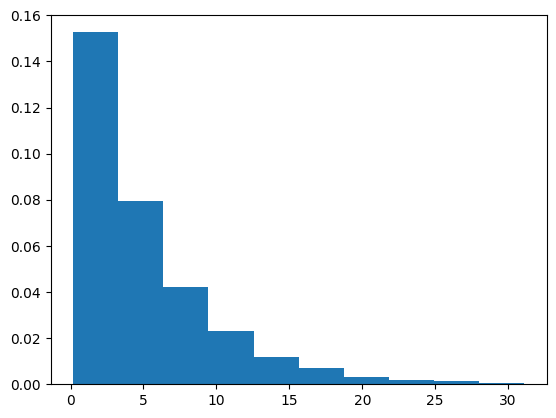

In [6]:
plt.hist(df_Medicine, density = True)
plt.show()

Text(0.5, 1.0, 'Acute Treatment (Medicine) Time Histogram')

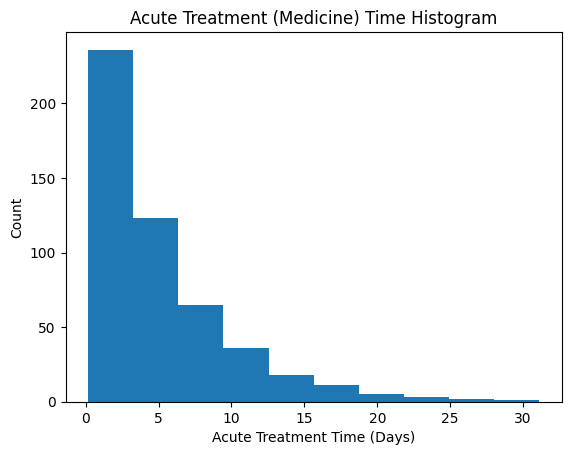

In [19]:
plt.hist(df_Medicine)
plt.xlabel('Acute Treatment Time (Days)')
plt.ylabel('Count')
plt.title('Acute Treatment (Medicine) Time Histogram')

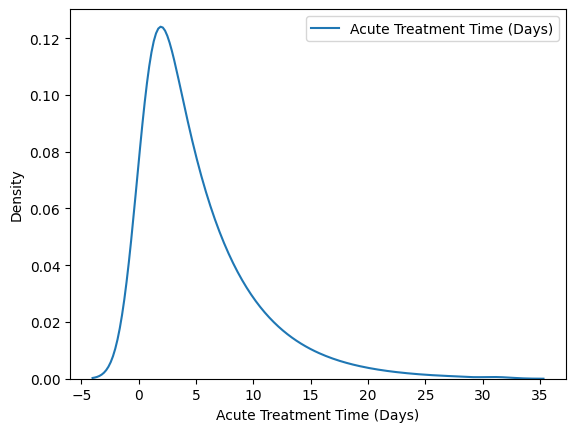

In [20]:
sns.kdeplot(df_Medicine)
plt.xlabel('Acute Treatment Time (Days)')
plt.ylabel('Density')
plt.show()

Text(0.5, 1.0, 'Acute Treatment (Neuro) Time Histogram')

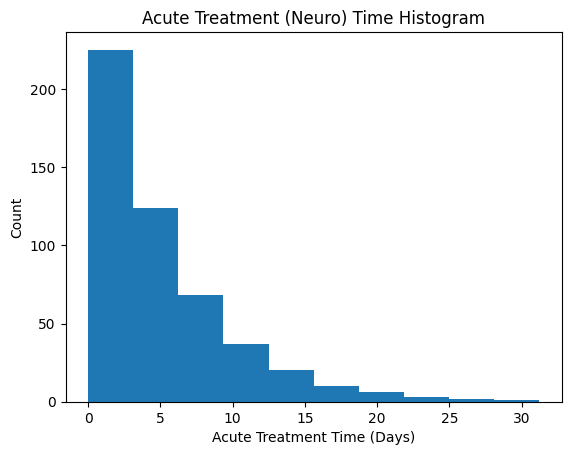

In [21]:
plt.hist(df_Neuro)
plt.xlabel('Acute Treatment Time (Days)')
plt.ylabel('Count')
plt.title('Acute Treatment (Neuro) Time Histogram')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def calculate_and_plot_residuals(data, dist_name):
    data = np.array(data).reshape(-1)
    dist = getattr(stats, dist_name)

    # Fit the distribution to the data
    params = dist.fit(data)

    # Calculate the theoretical quantiles
    theoretical_quantiles = dist.ppf(stats.rankdata(data) / (len(data) + 1), *params)

    # Calculate residuals
    residuals = data - theoretical_quantiles

    # Plot residuals
    plt.figure(figsize=(10, 6))

    # Residual plot
    plt.subplot(2, 1, 1)
    plt.scatter(theoretical_quantiles, residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residual Plot for {dist_name}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Residuals')
    plt.grid(True)

    # Histogram of residuals
    plt.subplot(2, 1, 2)
    plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Residual Histogram for {dist_name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Parameters for expon: (0.1757588370774613, 4.8739511629225385)
Parameters for gamma: (0.9518364301786054, 0.17575883707746126, 5.056972362069644)
Parameters for lognorm: (0.9740900909915426, -0.18001726548469968, 3.430756349732373)


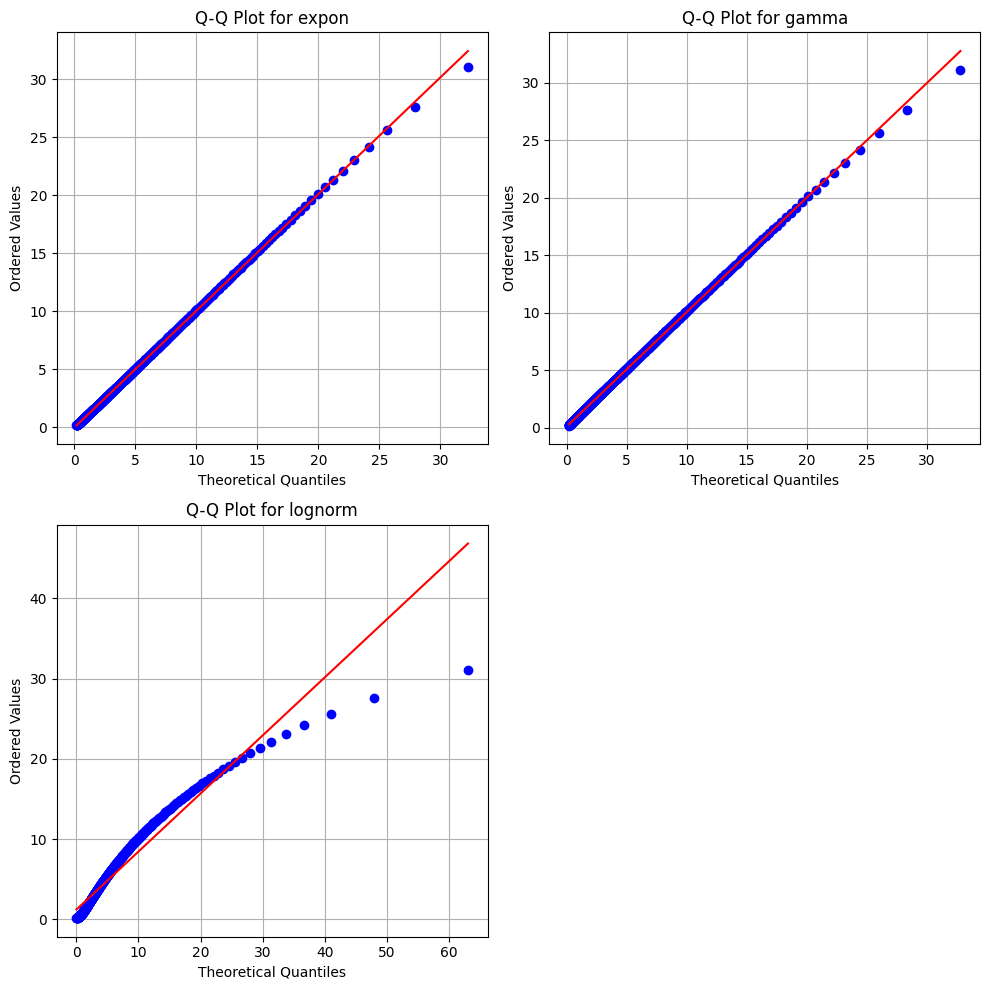

Kolmogorov-Smirnov Test Results:
expon: KS Statistic = 0.0060, p-value = 1.0000e+00
gamma: KS Statistic = 0.0124, p-value = 1.0000e+00
lognorm: KS Statistic = 0.0382, p-value = 4.4736e-01


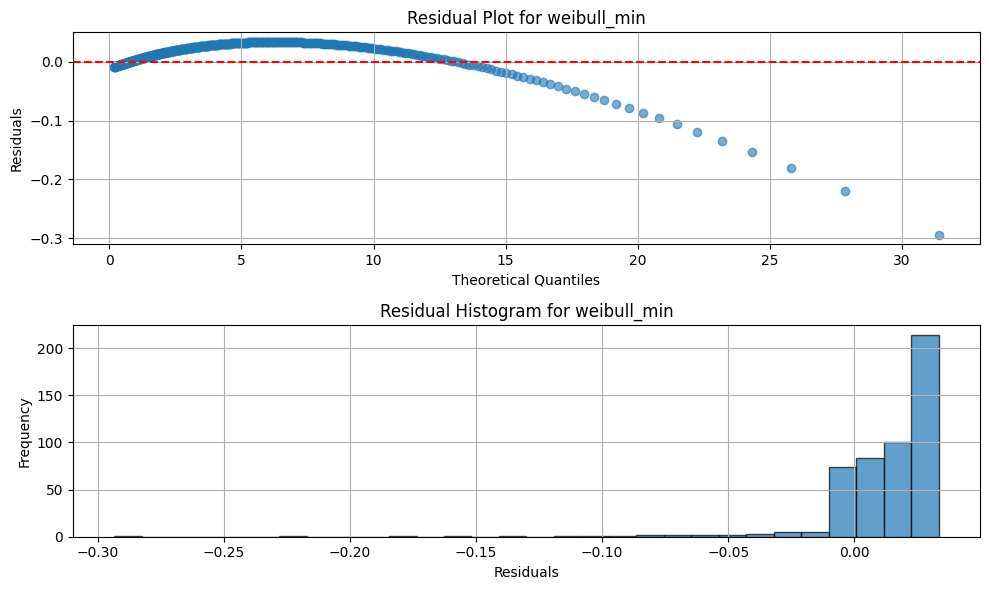

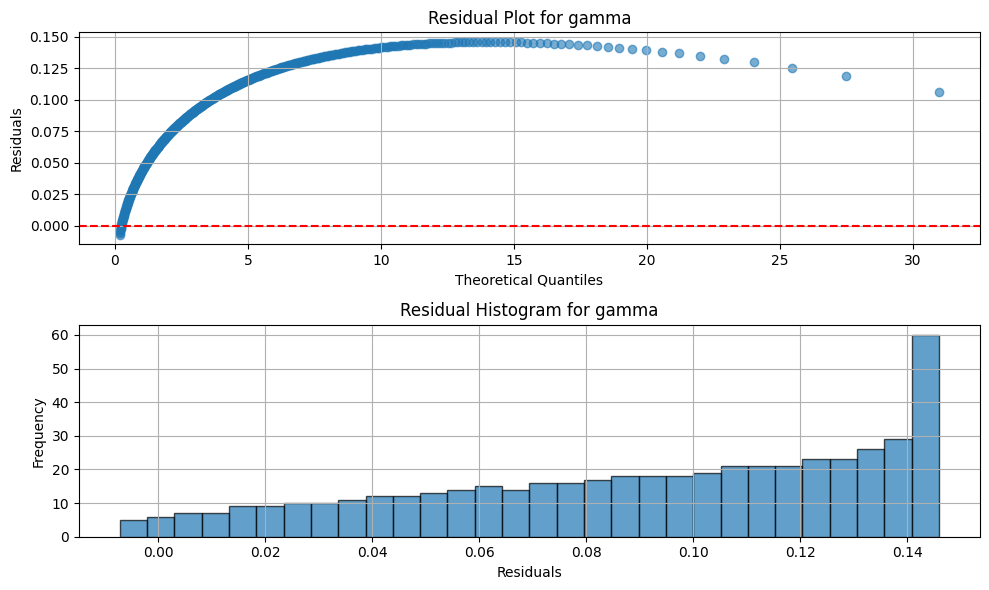

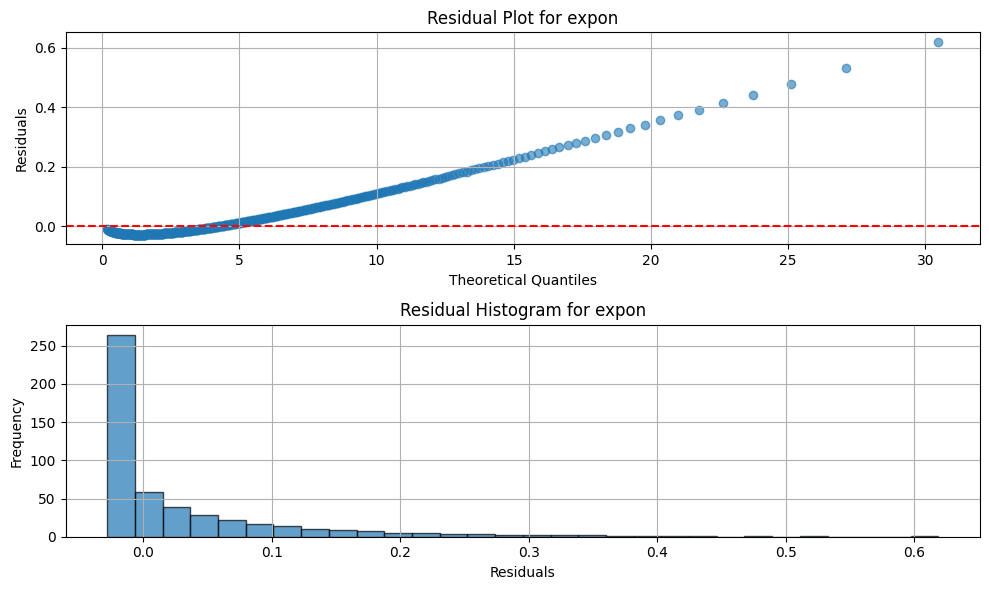

In [10]:
fit_and_test_distributions(df_Medicine)
calculate_and_plot_residuals(df_Medicine, 'weibull_min')
calculate_and_plot_residuals(df_Medicine, 'gamma')
calculate_and_plot_residuals(df_Medicine, 'expon')

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def fit_and_test_distributions(data):
    data = np.array(data).reshape(-1)
    # Candidate distributions
    distributions = ['expon', 'gamma', 'lognorm']

    # Prepare to store results
    ks_results = {}

    # Set up subplots for Q-Q plots
    num_distributions = len(distributions)
    cols = 2  # Number of columns in the subplot grid
    rows = (num_distributions + 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(10, 5 * rows))
    axes = axes.flatten()

    # Iterate over each distribution
    for i, dist_name in enumerate(distributions):
        dist = getattr(stats, dist_name)

        # Fit the distribution to the data
        params = dist.fit(data)
        print(f"Parameters for {dist_name}: {params}")

        # Get the KS test statistic and p-value
        ks_stat, p_value = stats.kstest(data, dist_name, args=params)
        ks_results[dist_name] = (ks_stat, p_value)

        # Generate Q-Q plot on the corresponding subplot
        ax = axes[i]
        stats.probplot(data, dist=dist, sparams=params, plot=ax)
        ax.set_title(f'Q-Q Plot for {dist_name}')
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Ordered Values')
        ax.grid(True)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    # Display KS test results
    print("Kolmogorov-Smirnov Test Results:")
    for dist_name, (ks_stat, p_value) in ks_results.items():
        print(f"{dist_name}: KS Statistic = {ks_stat:.4f}, p-value = {p_value:.4e}")


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm   ] [0.00 sec] [RSS: 0.0231636] [loc=5.050 scale=4.840]
[distfit] >INFO> [expon  ] [0.00 sec] [RSS: 1.83025e-05] [loc=0.176 scale=4.874]
[distfit] >INFO> [gamma  ] [0.07 sec] [RSS: 3.16675e-05] [loc=0.176 scale=5.057]
[distfit] >INFO> [lognorm] [0.00 sec] [RSS: 0.000930331] [loc=-0.180 scale=3.431]
[distfit] >INFO> [norm   ] [0.09 sec] [RSS: 0.0231636] [loc=5.050 scale=4.840]
[distfit] >INFO> [expon  ] [0.09 sec] [RSS: 1.83025e-05] [loc=0.176 scale=4.874]
[distfit] >INFO> [gamma  ] [0.09 sec] [RSS: 3.16675e-05] [loc=0.176 scale=5.057]
[distfit] >INFO> [lognorm] [0.01 sec] [RSS: 0.000930331] [loc=-0.180 scale=3.431]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Expon(loc:0.175759, scale:4.873951)
[distfit] >INFO> Ploting Summary.


{'name': 'expon',
 'score': 1.8302521567475836e-05,
 'loc': 0.1757588370774613,
 'scale': 4.8739511629225385,
 'arg': (),
 'params': (0.1757588370774613, 4.8739511629225385),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7a35068617b0>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': 0.4257598489077914,
 'CII_max_alpha': 14.776811635570512}

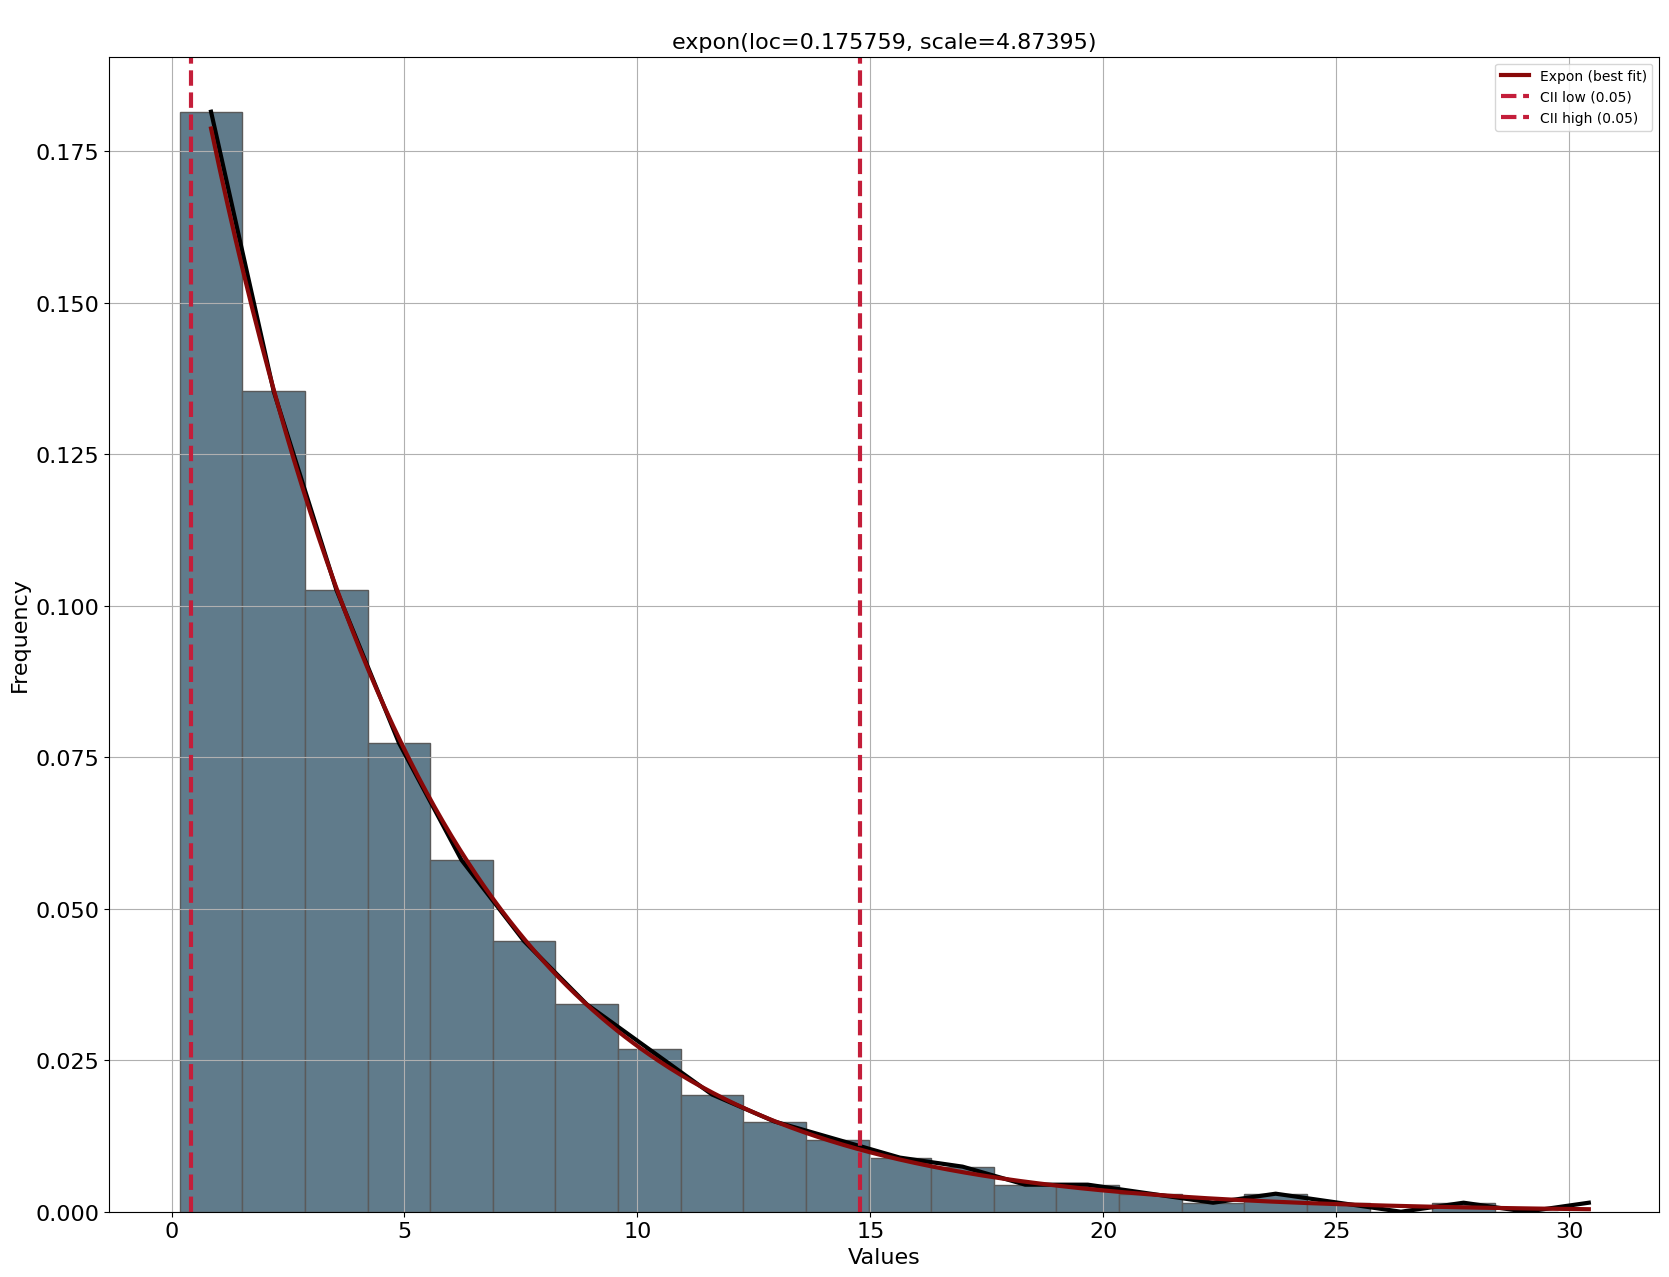

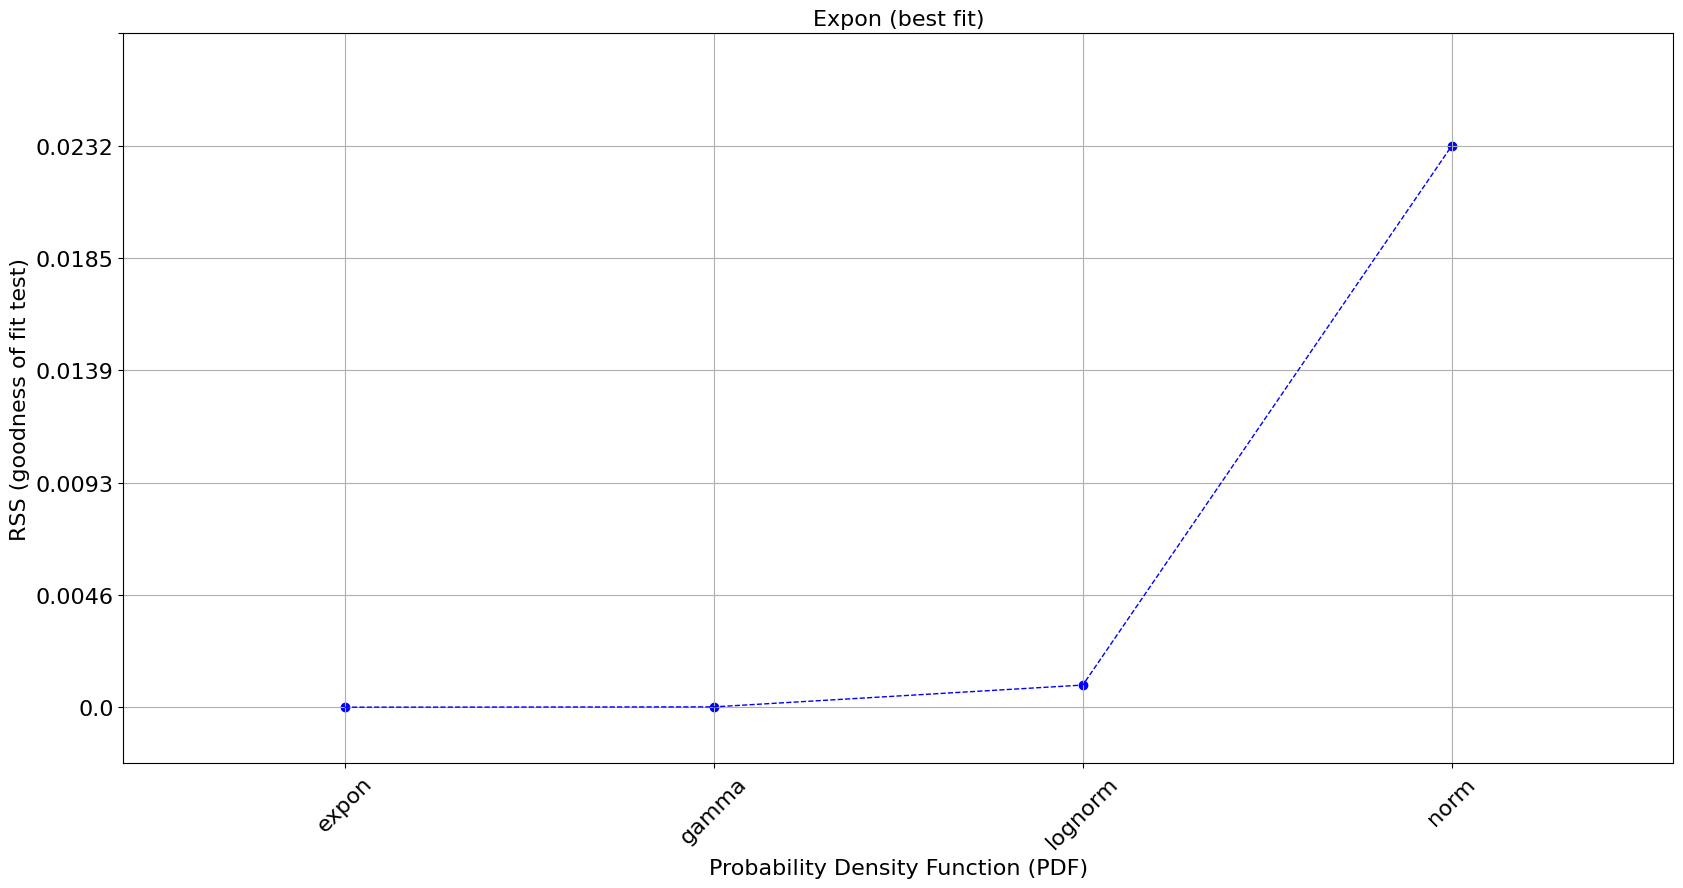

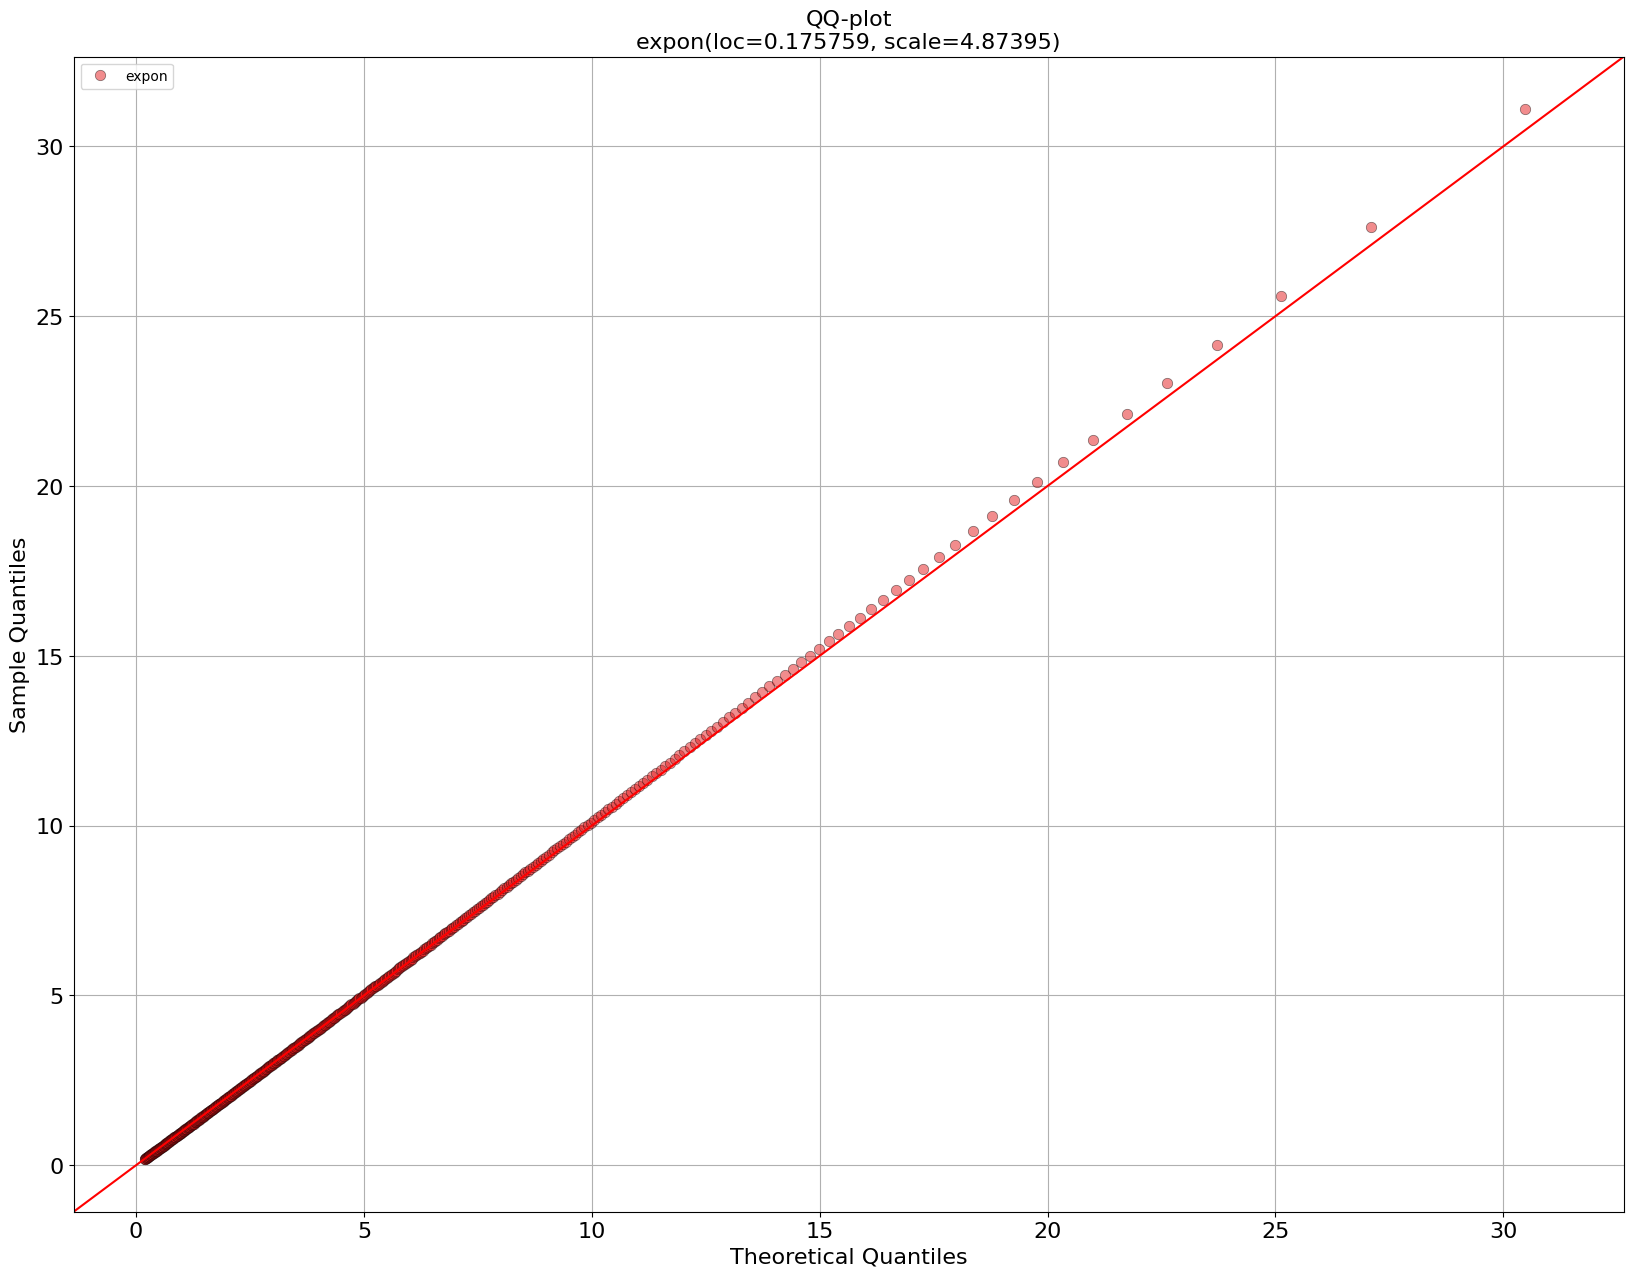

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from distfit import distfit
from scipy.stats import probplot

def fit_and_plot(data,distributions = ['norm', 'expon', 'gamma', 'lognorm' ] ):
    data = np.asarray(data).reshape(-1)

    # Fit the distribution
    dist = distfit(distr = distributions)

    # Fit the data
    dist.fit_transform(data)
    dist.plot()
    dist.plot_summary()
    fig, ax = dist.qqplot(data)


    # Return the best-fit distribution details
    return dist.model

fit_and_plot(df_Medicine)

In [12]:
params = expon.fit(df_Medicine)
params
loc, scale = params
print(f"Exponential Distribution Parameters: loc={loc}, scale={scale}")
lamba = 1/scale
print(f"Lambda: {lamba}")

Exponential Distribution Parameters: loc=0.1757588370774613, scale=4.8739511629225385
Lambda: 0.2051723471517872


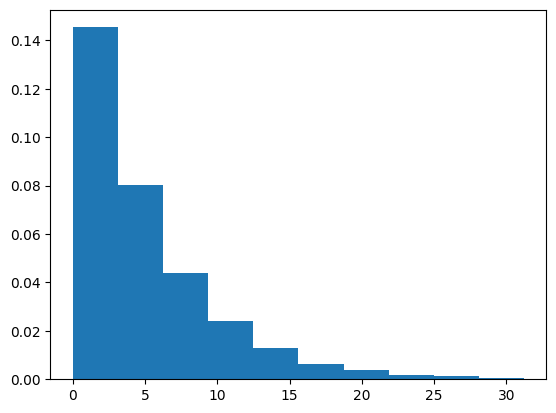

In [13]:
plt.hist(df_Neuro, density = True)
plt.show()

Parameters for expon: (0.006892251428813848, 5.088719821620802)
Parameters for gamma: (1.0075949249013576, 0.006811324024121541, 5.050419785585509)
Parameters for lognorm: (0.9372127136213683, -0.4125063860609432, 3.714878296667345)


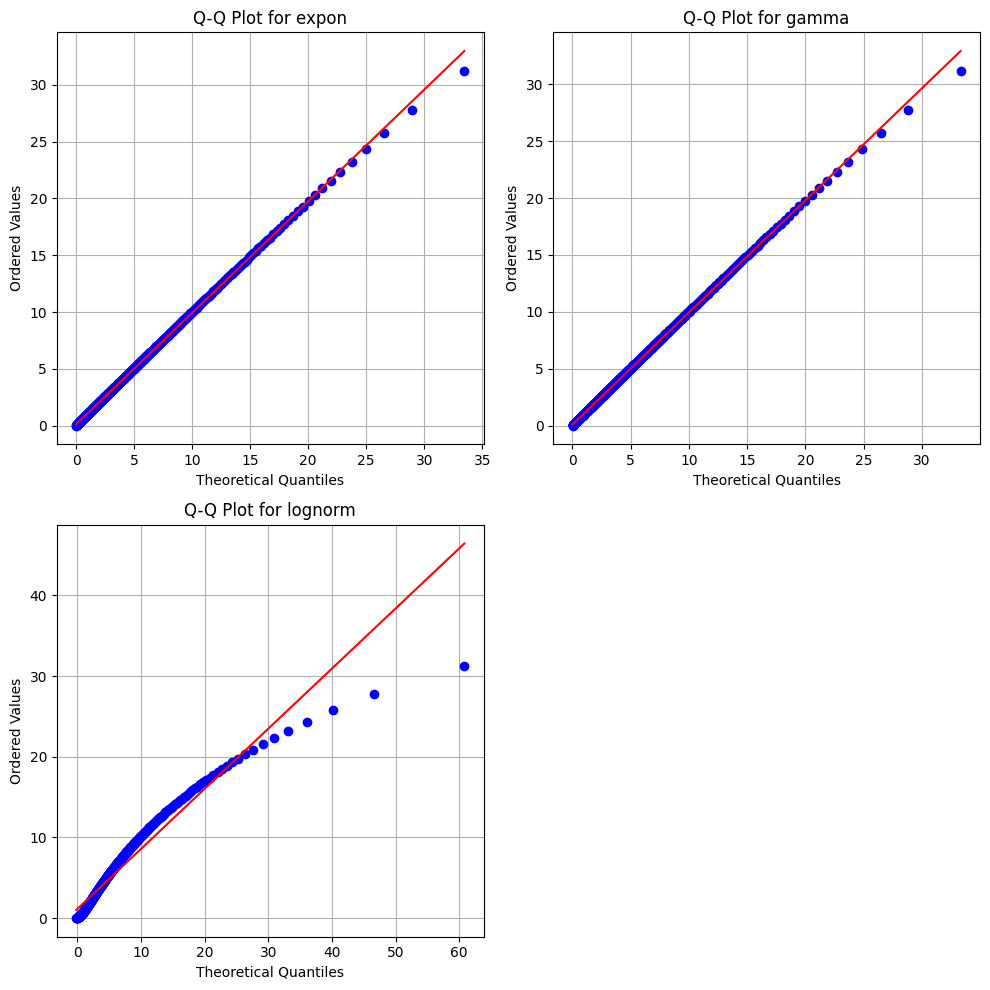

Kolmogorov-Smirnov Test Results:
expon: KS Statistic = 0.0082, p-value = 1.0000e+00
gamma: KS Statistic = 0.0068, p-value = 1.0000e+00
lognorm: KS Statistic = 0.0366, p-value = 5.0653e-01


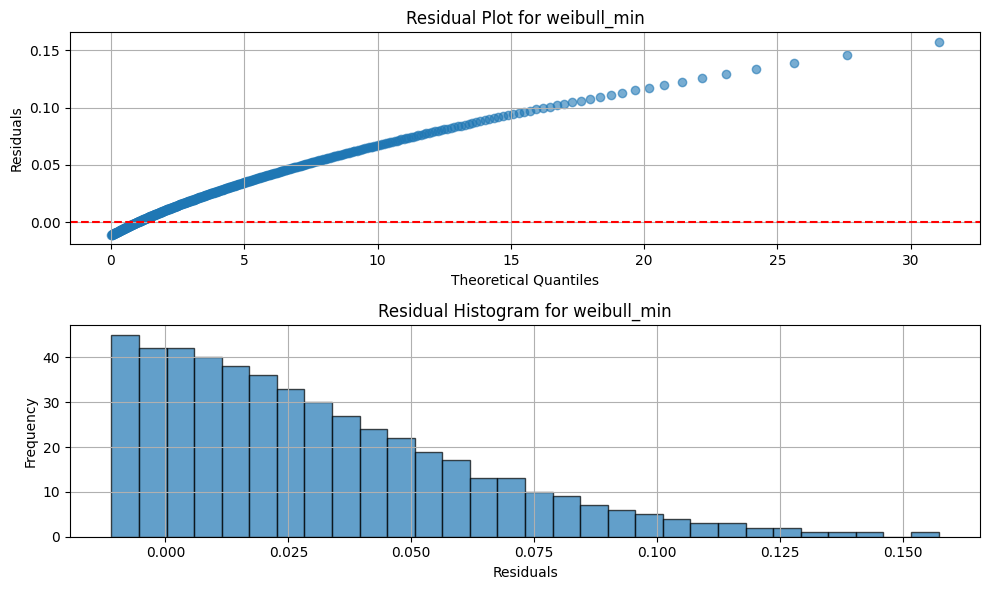

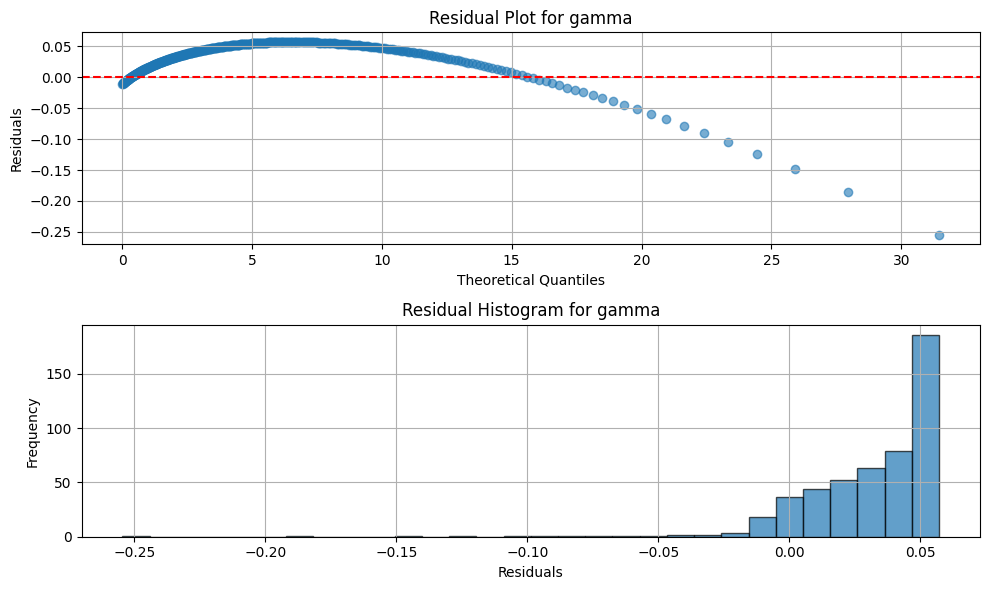

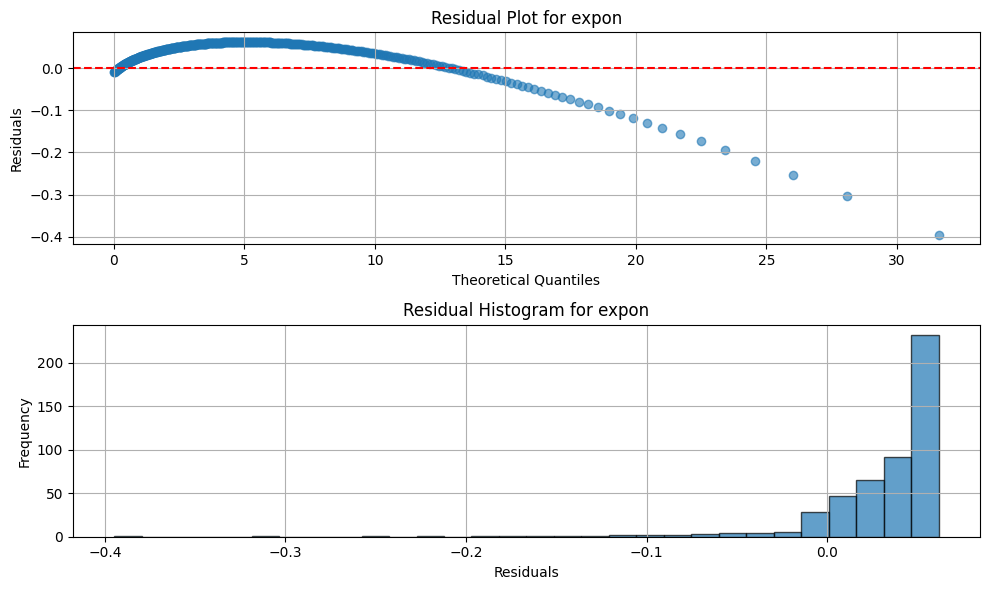

In [14]:
fit_and_test_distributions(df_Neuro)
calculate_and_plot_residuals(df_Neuro, 'weibull_min')
calculate_and_plot_residuals(df_Neuro, 'gamma')
calculate_and_plot_residuals(df_Neuro, 'expon')

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [expon] [0.00 sec] [RSS: 2.96997e-05] [loc=0.007 scale=5.089]
[distfit] >INFO> [gamma] [0.06 sec] [RSS: 2.19756e-05] [loc=0.007 scale=5.050]
[distfit] >INFO> [expon] [0.07 sec] [RSS: 2.96997e-05] [loc=0.007 scale=5.089]
[distfit] >INFO> [gamma] [0.07 sec] [RSS: 2.19756e-05] [loc=0.007 scale=5.050]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Gamma(loc:0.006811, scale:5.050420)
[distfit] >INFO> Ploting Summary.


{'name': 'gamma',
 'score': 2.1975609733663528e-05,
 'loc': 0.006811324024121541,
 'scale': 5.050419785585509,
 'arg': (1.0075949249013576,),
 'params': (1.0075949249013576, 0.006811324024121541, 5.050419785585509),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7a3504627e50>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': 0.27278526141550297,
 'CII_max_alpha': 15.210723180196341}

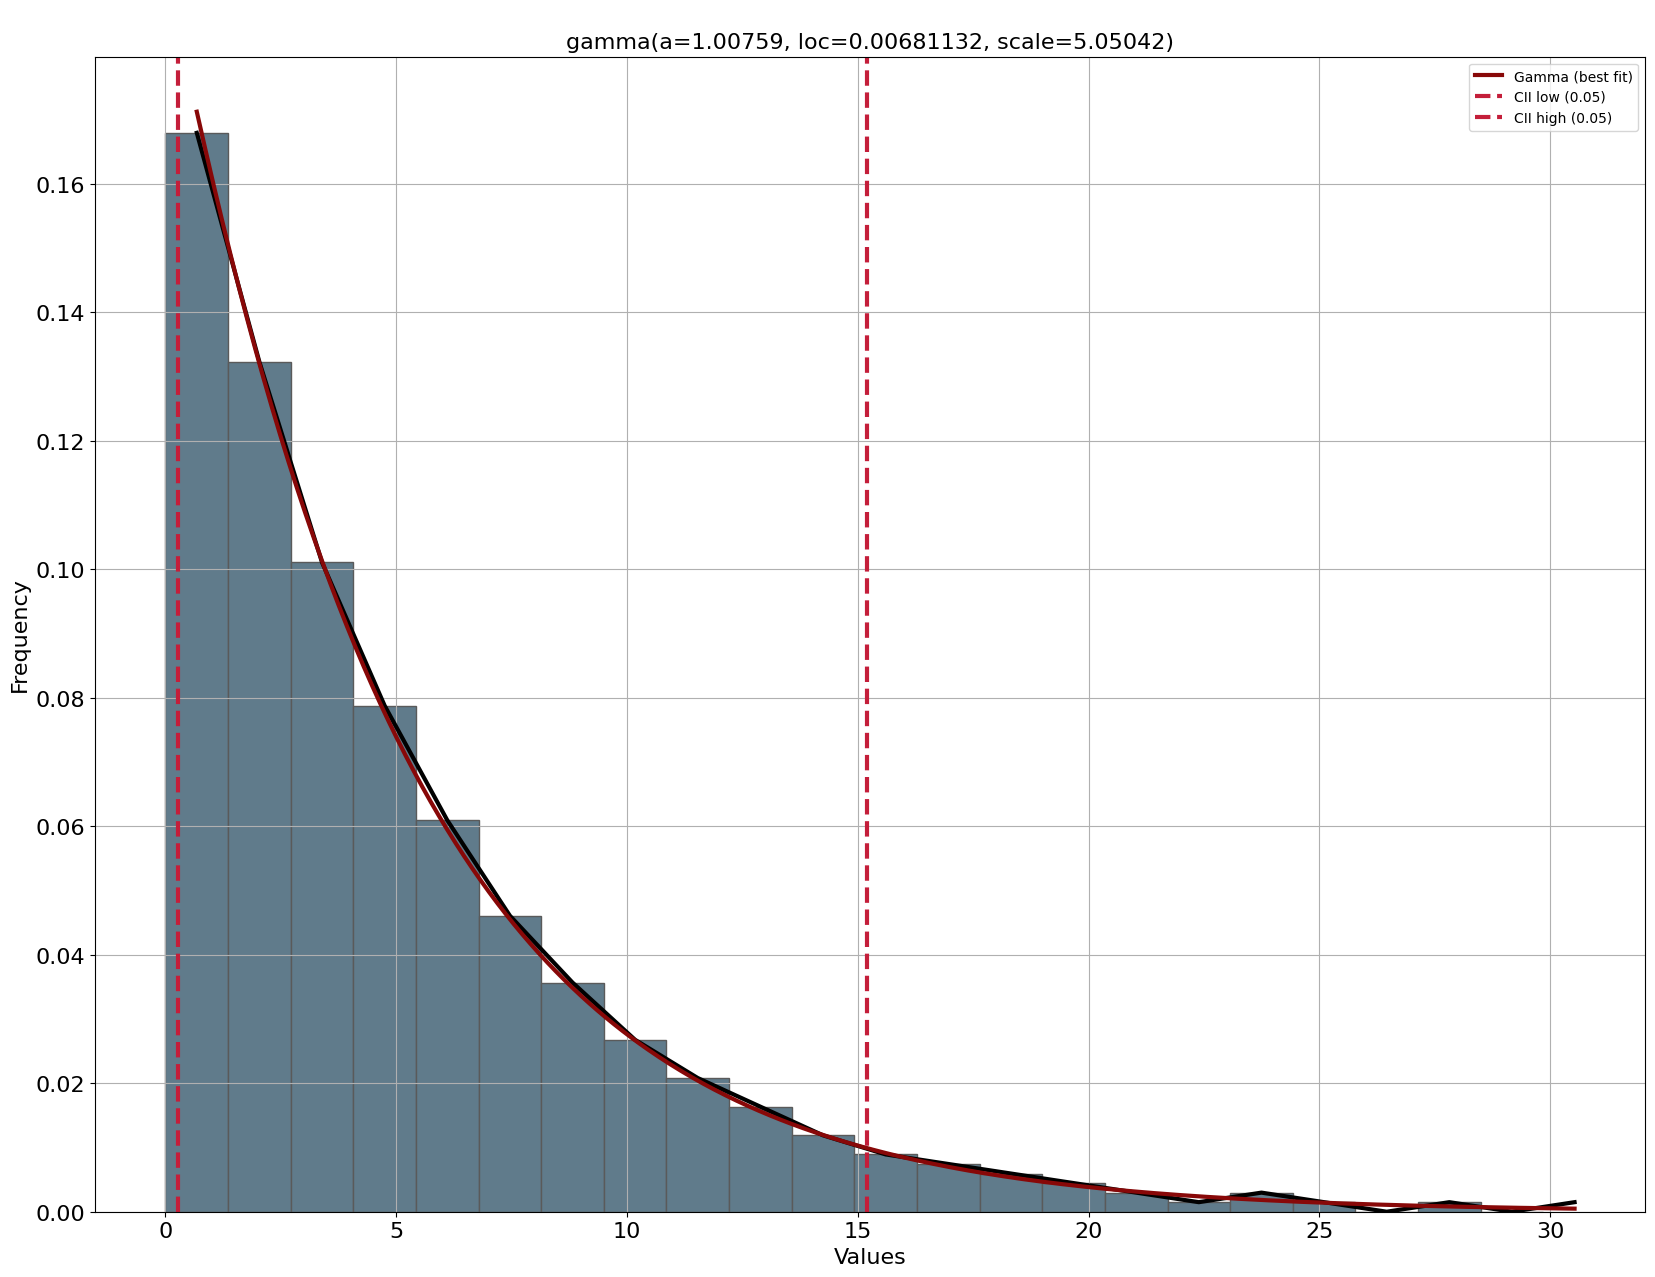

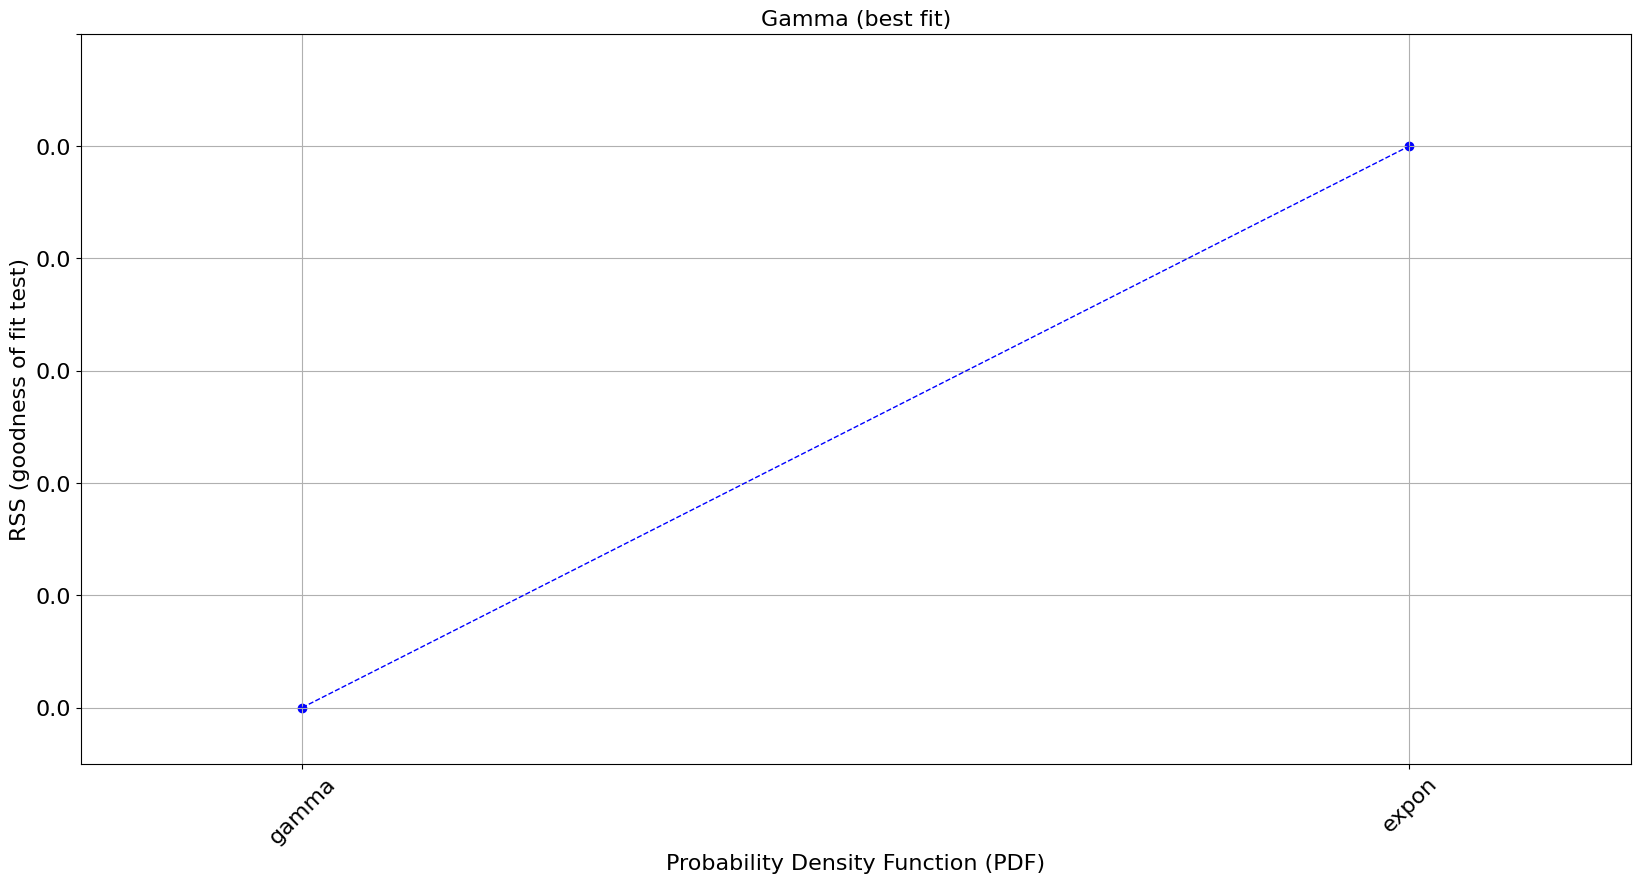

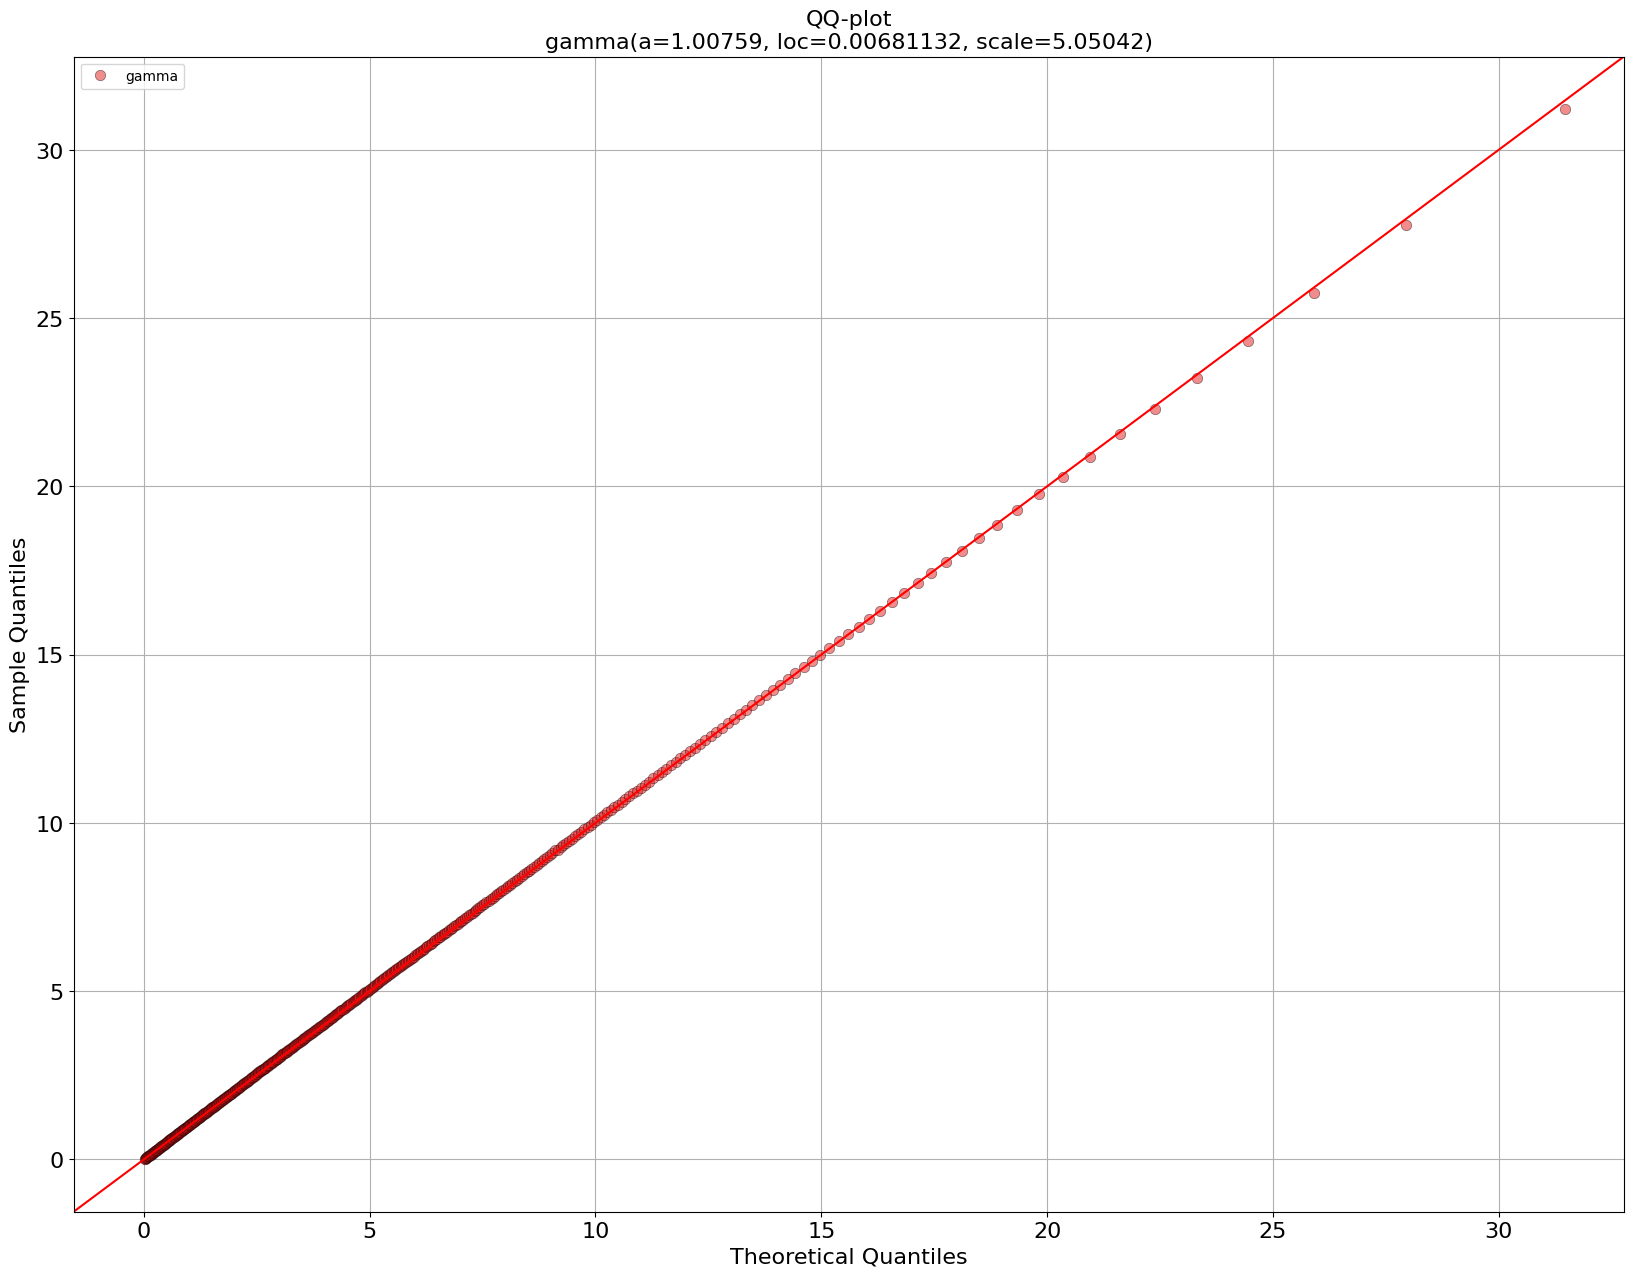

In [15]:
fit_and_plot(df_Neuro, ['expon', 'gamma'])

In [16]:
params = gamma.fit(df_Neuro)
print(params)


(1.0075949249013576, 0.006811324024121541, 5.050419785585509)


In [17]:
skewness_medicine =  skew(df_Medicine)
kurtosis_medicine = kurtosis(df_Medicine)
print("medicine_Skewness: ",skewness_medicine)
print("medicine_Kurtosis: ",kurtosis_medicine)

medicine_Skewness:  [1.80441807]
medicine_Kurtosis:  [4.07729692]


In [18]:
skewness_Neuro =  skew(df_Neuro)
kurtosis_Neuro = kurtosis(df_Neuro)
print("neuro_Skewness: ",skewness_Neuro)
print("neuro_Kurtosis: ",kurtosis_Neuro)

neuro_Skewness:  [1.75015885]
neuro_Kurtosis:  [3.81230446]


# Arrival Data


In [ ]:
file_id = '1Sx8xUH04Ufn8belm2r8UTHneCP7sVOBW'
url = f'https://drive.google.com/uc?id={file_id}'

arrival_data = 'ArrivalData.xlsx'
gdown.download(url, arrival_data, quiet=False)
arrival_data_df = pd.read_excel(arrival_data)
arrival_data_df.head()

Downloading...
From: https://drive.google.com/uc?id=1Sx8xUH04Ufn8belm2r8UTHneCP7sVOBW
To: /content/ArrivalData.xlsx
100%|██████████| 394k/394k [00:00<00:00, 6.20MB/s]


,Week,Day of the Week,isWeekday,Hour,NofArrival
0,1,Monday,1,00:00-01:00,0
1,1,Monday,1,01:00-02:00,0
2,1,Monday,1,02:00-03:00,0
3,1,Monday,1,03:00-04:00,0
4,1,Monday,1,04:00-05:00,0


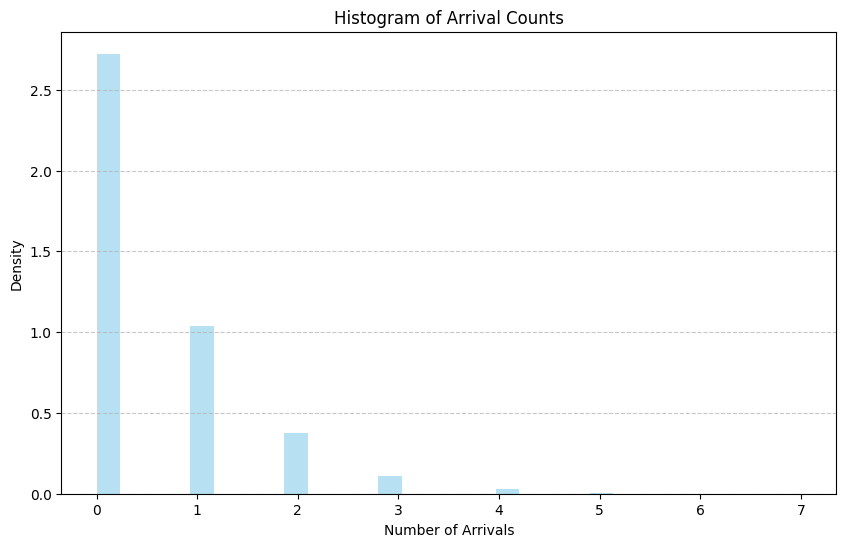

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(arrival_data_df['NofArrival'], bins=30, density=True, alpha=0.6, color='skyblue')
plt.title("Histogram of Arrival Counts")
plt.xlabel('Number of Arrivals')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

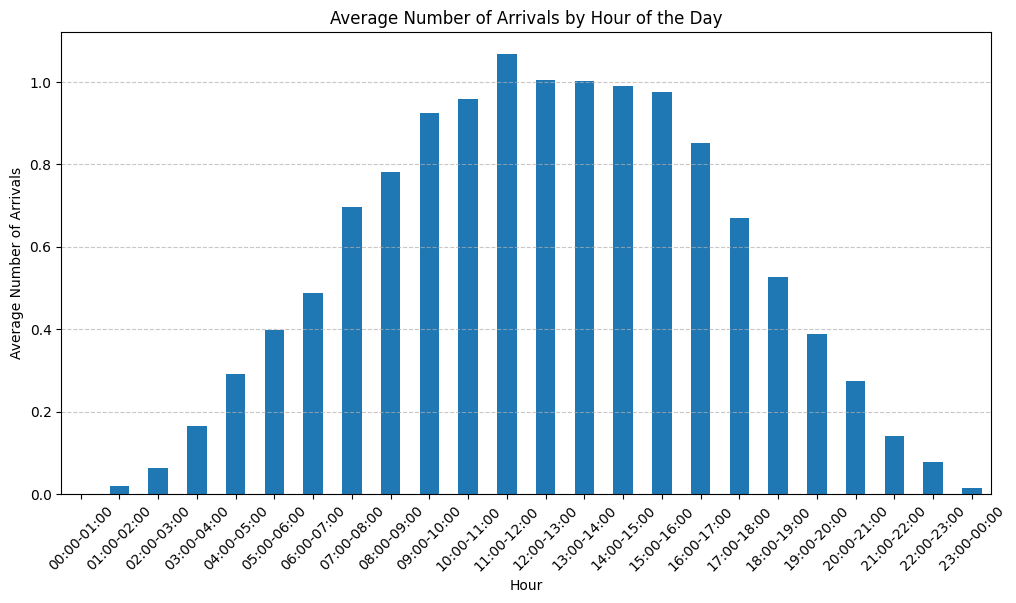

In [ ]:
# Aggregate data by Hour to see the overall pattern of arrivals by hour of the day
hourly_data = arrival_data_df.groupby('Hour')['NofArrival'].mean()

# Plotting the hourly arrival data
plt.figure(figsize=(12, 6))
hourly_data.plot(kind='bar')
plt.title('Average Number of Arrivals by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Number of Arrivals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

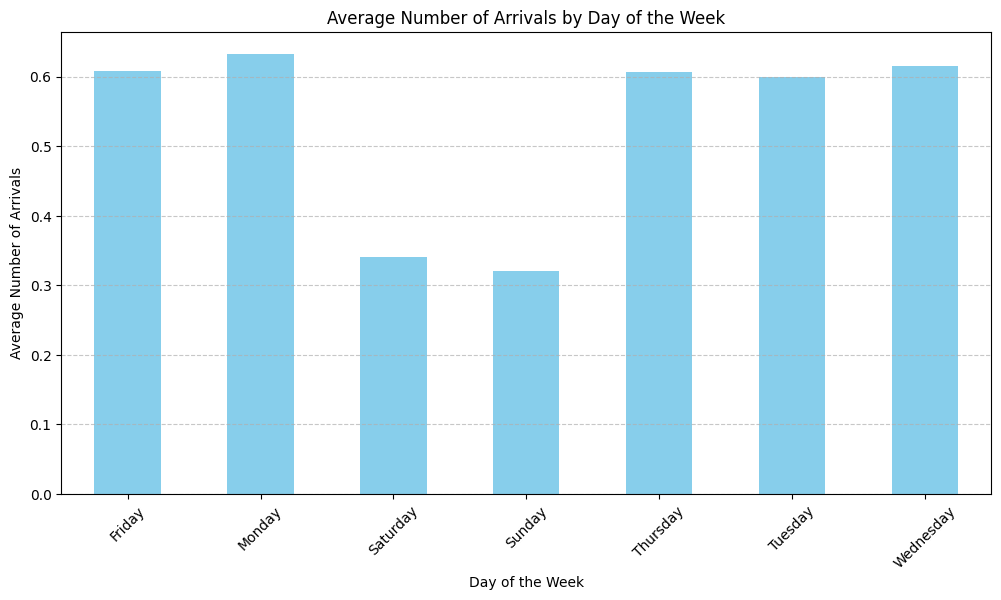

In [ ]:
# Aggregate data by Day of the Week to see the overall pattern of arrivals
daily_data = arrival_data_df.groupby('Day of the Week')['NofArrival'].mean()

# Plotting the daily arrival data
plt.figure(figsize=(12, 6))
daily_data.plot(kind='bar', color='skyblue')
plt.title('Average Number of Arrivals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Arrivals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

# Calculate descriptive statistics
print("Descriptive Statistics:")
print(arrival_data_df['NofArrival'].describe())
print(f"Skewness: {skew(arrival_data_df['NofArrival'])}")

Descriptive Statistics:
count    16800.000000
mean         0.531667
std          0.836157
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          7.000000
Name: NofArrival, dtype: float64
Skewness: 1.8204455348229258


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 71.9967] [loc=0.532 scale=0.836]
[distfit] >INFO> [expon     ] [0.01 sec] [RSS: 59.3384] [loc=0.000 scale=0.532]
[distfit] >INFO> [pareto    ] [0.05 sec] [RSS: 59.3384] [loc=-134217728.000 scale=134217728.000]
[distfit] >INFO> [dweibull  ] [0.23 sec] [RSS: 70.1007] [loc=0.574 scale=0.778]
[distfit] >INFO> [t         ] [1.98 sec] [RSS: 77.8317] [loc=-0.000 scale=0.000]
[distfit] >INFO> [genextreme] [0.77 sec] [RSS: 77.8418] [loc=0.000 scale=0.000]
[distfit] >INFO> [gamma     ] [0.22 sec] [RSS: 62.3927] [loc=-0.000 scale=1.070]
[distfit] >INFO> [lognorm   ] [0.57 sec] [RSS: 77.6401] [loc=-0.000 scale=0.000]
[distfit] >INFO> [beta      ] [0.62 sec] [RSS: 46.4238] [loc=-0.000 scale=55.006]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 76.005] [loc=0.000 scale=7.000]
[distfit] >INFO> [loggamma  ] [0.34 sec] [RSS: 72.1027] [loc=-262.442 scale=35.321]
[distfit] >INFO> [norm      ] [4.88 sec] [RSS: 

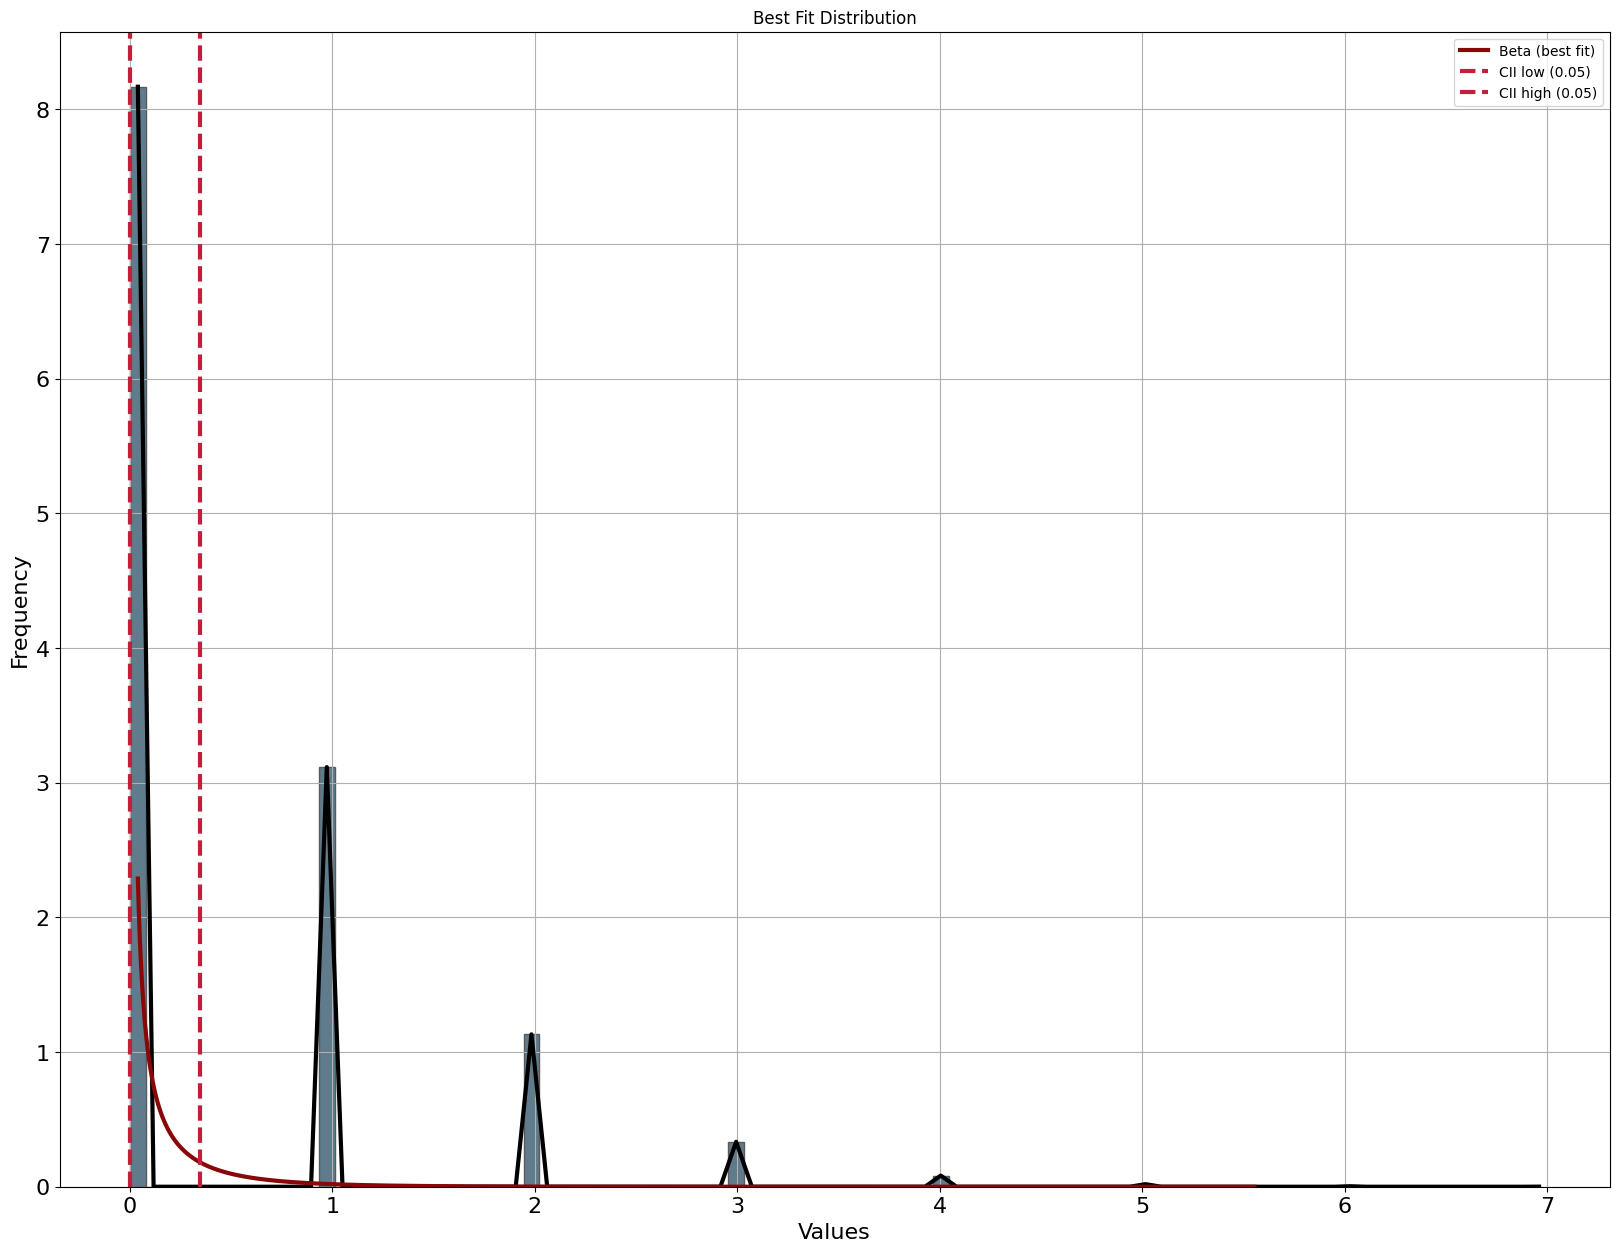

Best fit distribution: beta
Best fit parameters: (0.12436004558363566, 111.8578317460904, -7.182856557095246e-30, 55.006287392731075)


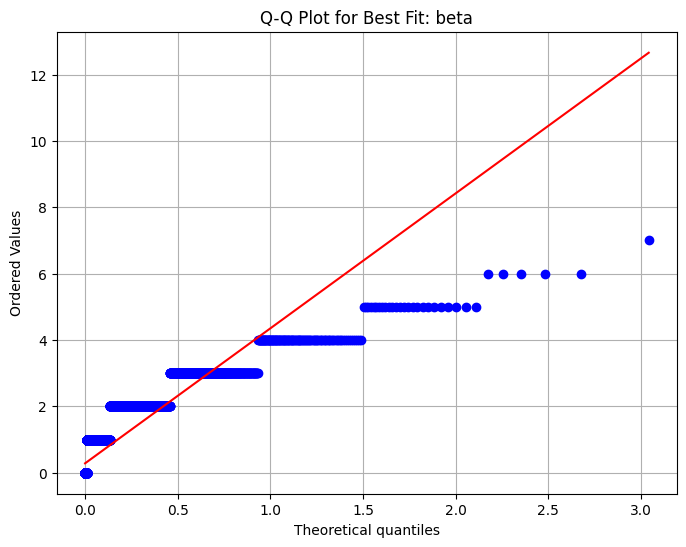

In [ ]:
# Extract data
data = arrival_data_df['NofArrival']

# Fit and plot the distribution
dist = fit_and_plot(data)

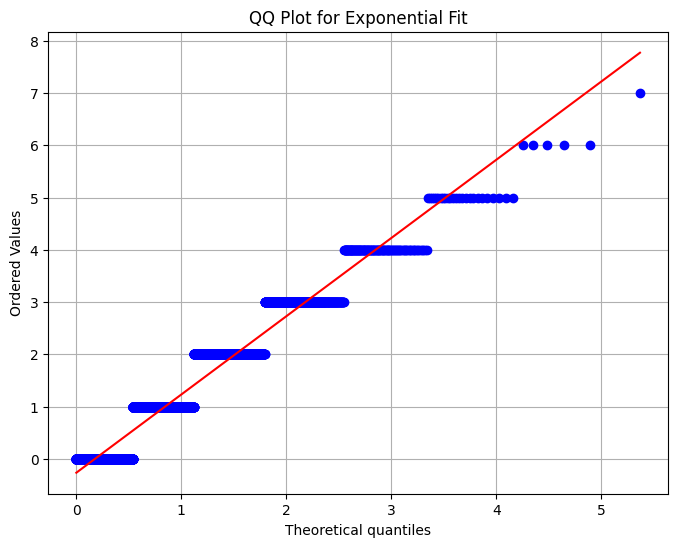

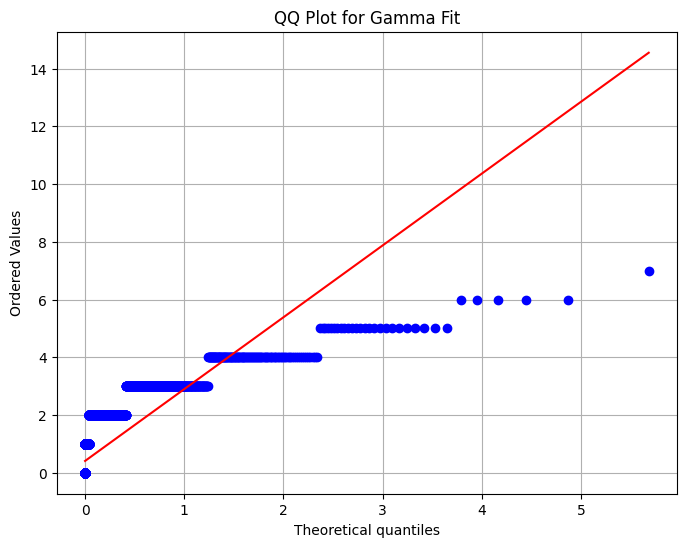

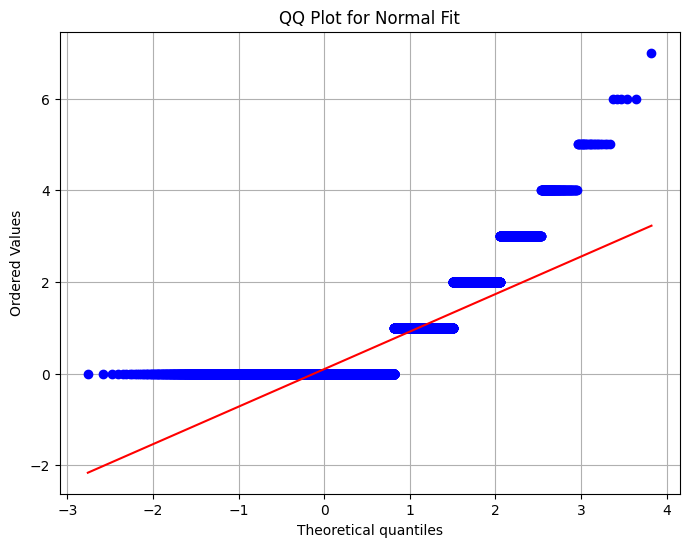

In [ ]:
# Ensuring that 'data' is properly defined as a numpy array for refitting
from scipy.stats import probplot
data = np.array(arrival_data_df['NofArrival'])

# Refit distributions to redefine parameters for Exponential, Gamma, and Normal distributions
params_exp = expon.fit(data)
params_gamma = gamma.fit(data)
params_norm = norm.fit(data)

# Generate QQ plots for Exponential, Gamma, and Normal distributions

# Exponential QQ plot
plt.figure(figsize=(8, 6))
probplot(data, dist="expon", sparams=params_exp, plot=plt)
plt.title("QQ Plot for Exponential Fit")
plt.grid()
plt.show()

# Gamma QQ plot
plt.figure(figsize=(8, 6))
probplot(data, dist="gamma", sparams=params_gamma, plot=plt)
plt.title("QQ Plot for Gamma Fit")
plt.grid()
plt.show()

# Normal QQ plot
plt.figure(figsize=(8, 6))
probplot(data, dist="norm", sparams=params_norm, plot=plt)
plt.title("QQ Plot for Normal Fit")
plt.grid()
plt.show()

In [ ]:
# Test Exponential
ks_exp = kstest(data, 'expon', args=params_exp)
print(f"Exponential KS Test: {ks_exp}")

# Test Gamma
ks_gamma = kstest(data, 'gamma', args=params_gamma)
print(f"Gamma KS Test: {ks_gamma}")

# Test Normal
ks_norm = kstest(data, 'norm', args=params_norm)
print(f"Normal KS Test: {ks_norm}")

Exponential KS Test: KstestResult(statistic=0.6353571428571428, pvalue=0.0, statistic_location=0, statistic_sign=1)
Gamma KS Test: KstestResult(statistic=0.5711492429993124, pvalue=0.0, statistic_location=0, statistic_sign=1)
Normal KS Test: KstestResult(statistic=0.37292484249930846, pvalue=0.0, statistic_location=0, statistic_sign=1)


In [ ]:
from scipy.mstats import nbinom
# Estimate parameters for Negative Binomial
mean_arrival = arrival_data_df['NofArrival'].mean()
var_arrival = arrival_data_df['NofArrival'].var()
r = (mean_arrival**2) / (var_arrival - mean_arrival)
p = r / (r + mean_arrival)

print(f"Estimated Negative Binomial Parameters: r={r}, p={p}")

# Compare the observed and theoretical Negative Binomial distributions
nbinom_prob = [nbinom.pmf(k, r, p) for k in x]

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(x, observed_freq / observed_freq.sum(), alpha=0.6, label='Observed', color='skyblue')
plt.plot(x, nbinom_prob, 'o-', label='Negative Binomial Fit', color='green')
plt.title("Negative Binomial Fit to Arrival Data")
plt.xlabel("Number of Arrivals")
plt.ylabel("Probability")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

ModuleNotFoundError: No module named 'scipy.mstats'

In [ ]:
from scipy.stats import chisquare

# Calculate expected frequencies for Poisson
expected_poisson = [poisson.pmf(k, lambda_poisson) * observed_freq.sum() for k in x]
expected_poisson = np.array(expected_poisson) * (observed_freq.sum() / sum(expected_poisson))  # Normalize

# Chi-square test for Poisson
chi2_poisson = chisquare(f_obs=observed_freq, f_exp=expected_poisson)
print(f"Poisson Chi-Square Test: {chi2_poisson}")

# Calculate expected frequencies for Negative Binomial
expected_nbinom = [nbinom.pmf(k, r, p) * observed_freq.sum() for k in x]
expected_nbinom = np.array(expected_nbinom) * (observed_freq.sum() / sum(expected_nbinom))  # Normalize

# Chi-square test for Negative Binomial
chi2_nbinom = chisquare(f_obs=observed_freq, f_exp=expected_nbinom)
print(f"Negative Binomial Chi-Square Test: {chi2_nbinom}")

In [ ]:
# Generate a QQ plot for the Negative Binomial fit
plt.figure(figsize=(8, 6))

# Simulate theoretical quantiles based on the Negative Binomial distribution
probplot(arrival_data['NofArrival'], dist="nbinom", sparams=(r, p), plot=plt)

plt.title("QQ Plot for Negative Binomial Fit")
plt.grid()
plt.show()

In [ ]:
from scipy.stats import poisson

# Estimate the Poisson rate (mean of the data)
lambda_poisson = arrival_data['NofArrival'].mean()
print(f"Estimated Poisson Rate (λ): {lambda_poisson}")

# Compare the observed and theoretical Poisson distributions
x = range(0, arrival_data['NofArrival'].max() + 1)
observed_freq = arrival_data['NofArrival'].value_counts().sort_index()
poisson_prob = [poisson.pmf(k, lambda_poisson) for k in x]

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(x, observed_freq / observed_freq.sum(), alpha=0.6, label='Observed', color='skyblue')
plt.plot(x, poisson_prob, 'o-', label='Poisson Fit', color='orange')
plt.title("Poisson Fit to Arrival Data")
plt.xlabel("Number of Arrivals")
plt.ylabel("Probability")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Generate QQ plot for Poisson distribution using the estimated λ
plt.figure(figsize=(8, 6))
probplot(arrival_data['NofArrival'], dist="poisson", sparams=(lambda_poisson,), plot=plt)
plt.title("QQ Plot for Poisson Fit")
plt.grid()
plt.show()

# Rehabilitiation Times

In [ ]:
file_id = '1j0ipbG5eCBuWZMtFmDslW1q4FSlbZzfD'
url = f'https://drive.google.com/uc?id={file_id}'

rehab_times = 'RehabilitationTimes.xlsx'
gdown.download(url, rehab_times, quiet=False)
rehab_df = pd.read_excel(rehab_times)
rehab_df.head()

Downloading...
From: https://drive.google.com/uc?id=1j0ipbG5eCBuWZMtFmDslW1q4FSlbZzfD
To: /content/RehabilitationTimes.xlsx
100%|██████████| 57.8k/57.8k [00:00<00:00, 3.56MB/s]


,Patient Id,Rehabilitation Time (Days),Rehab Category
0,0,14.586638,Medically Complex
1,1,12.532093,Medically Complex
2,2,48.087618,Stroke
3,3,6.104037,Stroke
4,4,10.763928,Medically Complex


In [ ]:
medically_complex_data = rehab_df[rehab_df['Rehab Category'] == 'Medically Complex']['Rehabilitation Time (Days)'].reset_index(drop=True)
stroke_data = rehab_df[rehab_df['Rehab Category'] == 'Stroke']['Rehabilitation Time (Days)'].reset_index(drop=True)

medically_complex_data.head()

,Rehabilitation Time (Days)
0,14.586638
1,12.532093
2,10.763928
3,12.254970
4,10.147572


In [ ]:
medically_complex_data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Rehabilitation Time (Days)
Non-Null Count  Dtype  
--------------  -----  
1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


In [ ]:
medically_complex_data.describe()

,Rehabilitation Time (Days)
count,1000.000000
mean,22.801338
std,14.571117
min,8.079934
25%,12.328694
50%,18.314080
75%,28.533499
max,110.218432


Text(0.5, 1.0, 'Medically Complex')

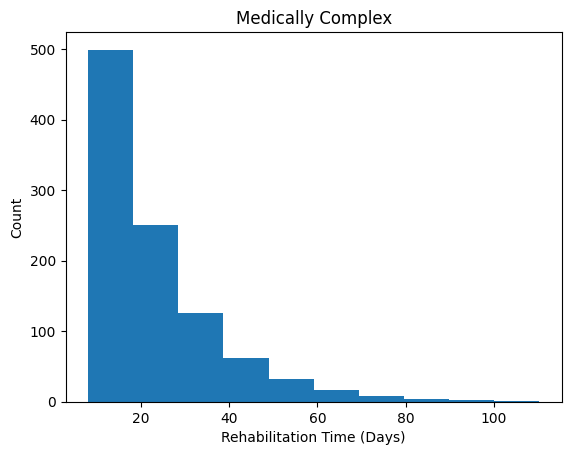

In [ ]:
plt.hist(medically_complex_data)
plt.xlabel('Rehabilitation Time (Days)')
plt.ylabel('Count')
plt.title('Medically Complex')

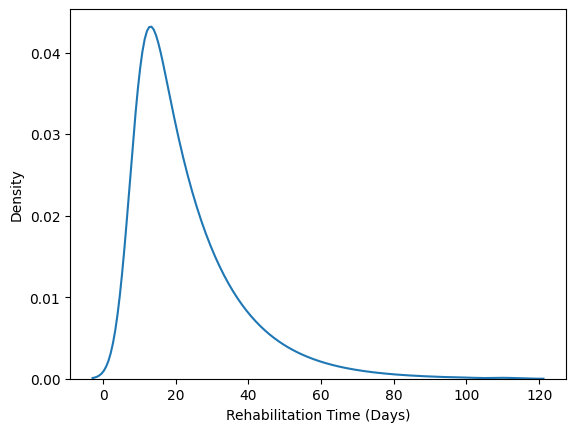

In [ ]:
sns.kdeplot(medically_complex_data)
plt.xlabel('Rehabilitation Time (Days)')
plt.ylabel('Density')
plt.show()

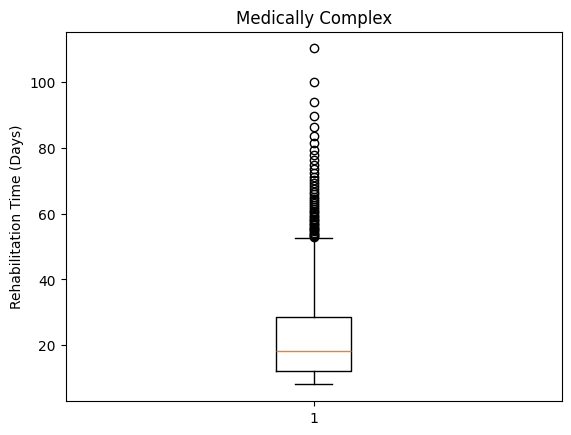

In [ ]:
plt.boxplot(medically_complex_data)
plt.ylabel('Rehabilitation Time (Days)')
plt.title('Medically Complex')
plt.show()

In [ ]:
medically_complex_data = medically_complex_data.values

In [ ]:
stroke_data.head()

,Rehabilitation Time (Days)
0,48.087618
1,6.104037
2,22.379375
3,2.711761
4,11.064195


In [ ]:
stroke_data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Rehabilitation Time (Days)
Non-Null Count  Dtype  
--------------  -----  
1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


In [ ]:
stroke_data = stroke_data[stroke_data >= 0]
stroke_data.describe()

,Rehabilitation Time (Days)
count,927.000000
mean,29.673489
std,26.065288
min,0.003885
25%,11.446310
50%,22.769151
75%,39.987095
max,200.815721


Text(0.5, 1.0, 'Stroke')

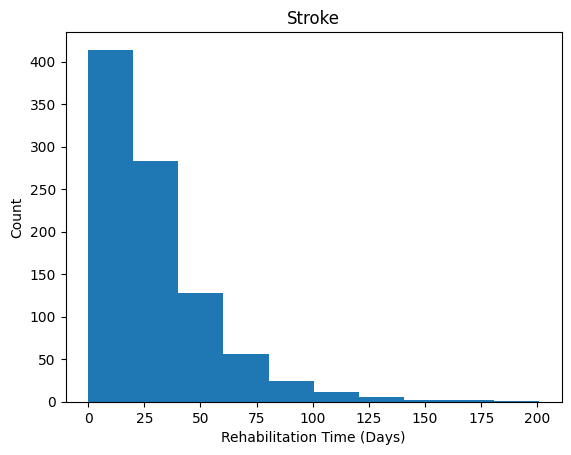

In [ ]:
plt.hist(stroke_data)
plt.xlabel('Rehabilitation Time (Days)')
plt.ylabel('Count')
plt.title('Stroke')

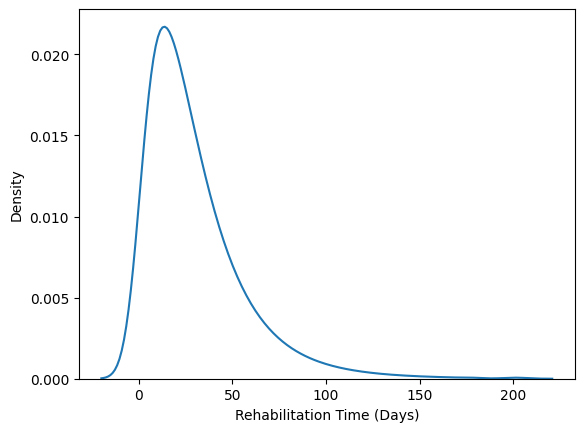

In [ ]:
sns.kdeplot(stroke_data)
plt.xlabel('Rehabilitation Time (Days)')
plt.ylabel('Density')
plt.show()

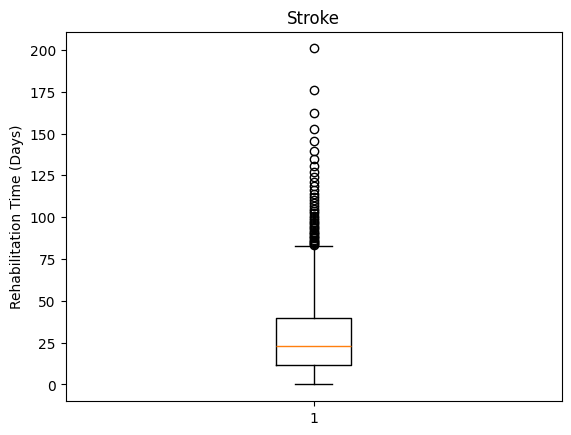

In [ ]:
plt.boxplot(stroke_data)
plt.ylabel('Rehabilitation Time (Days)')
plt.title('Stroke')
plt.show()

In [ ]:
def chi_squared_gof_test(data, dist_name, bins=10):
    """Perform a chi-squared goodness-of-fit test for a given distribution.

    Parameters:
        data (array-like): Observed data.
        dist_name (str): Name of the theoretical distribution (e.g., 'gamma', 'weibull_min').
        bins (int): Number of bins for the histogram.
    """
    # Get the distribution object
    dist = getattr(stats, dist_name)

    # Fit the distribution to the data
    params = dist.fit(data)

    # Create histogram bins
    observed, bin_edges = np.histogram(data, bins=bins, density=False)

    # Calculate expected frequencies
    expected = []
    for i in range(len(bin_edges) - 1):
        cdf_low = dist.cdf(bin_edges[i], *params)
        cdf_high = dist.cdf(bin_edges[i + 1], *params)
        expected.append(len(data) * (cdf_high - cdf_low))

    # Adjust expected and observed frequencies to have the same total count
    expected = np.array(expected)
    scale_factor = np.sum(observed) / np.sum(expected)
    expected *= scale_factor

    # Perform chi-squared test
    chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

    # Print results
    print(f"Chi-Squared Statistic: {chi2_stat:.4f}")
    print(f"p-value: {p_value:.4e}")

    return chi2_stat, p_value
chi, p = chi_squared_gof_test(medically_complex_data, 'weibull_min')
print(chi, p)
chi, p = chi_squared_gof_test(medically_complex_data, 'gamma')
print(chi, p)
chi, p = chi_squared_gof_test(medically_complex_data, 'expon')
print(chi, p)

Chi-Squared Statistic: 0.0532
p-value: 1.0000e+00
0.05319116902163041 0.9999999984747556
Chi-Squared Statistic: 0.4803
p-value: 9.9997e-01
0.48029263124202876 0.9999743997739153
Chi-Squared Statistic: 0.0583
p-value: 1.0000e+00
0.05834625890851872 0.9999999976921642


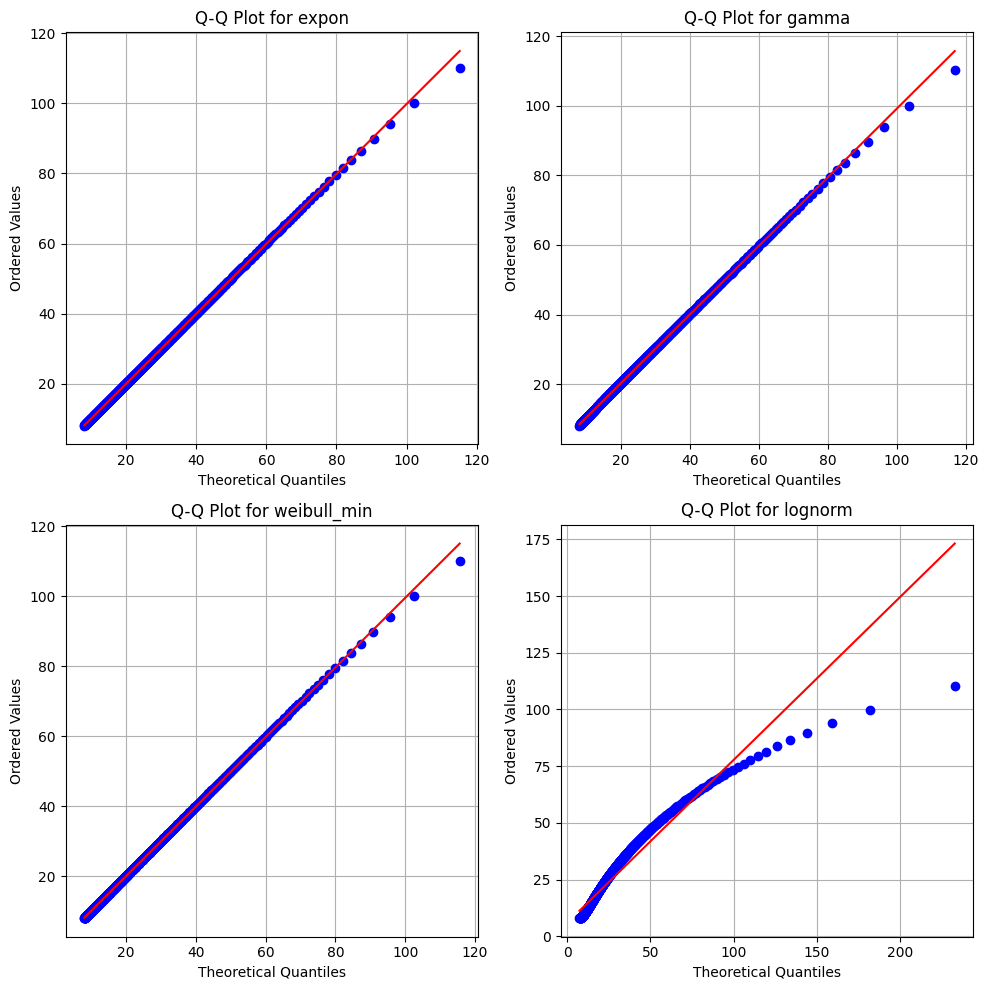

Kolmogorov-Smirnov Test Results:
expon: KS Statistic = 0.0020, p-value = 1.0000e+00
gamma: KS Statistic = 0.0123, p-value = 9.9761e-01
weibull_min: KS Statistic = 0.0025, p-value = 1.0000e+00
lognorm: KS Statistic = 0.0365, p-value = 1.3665e-01


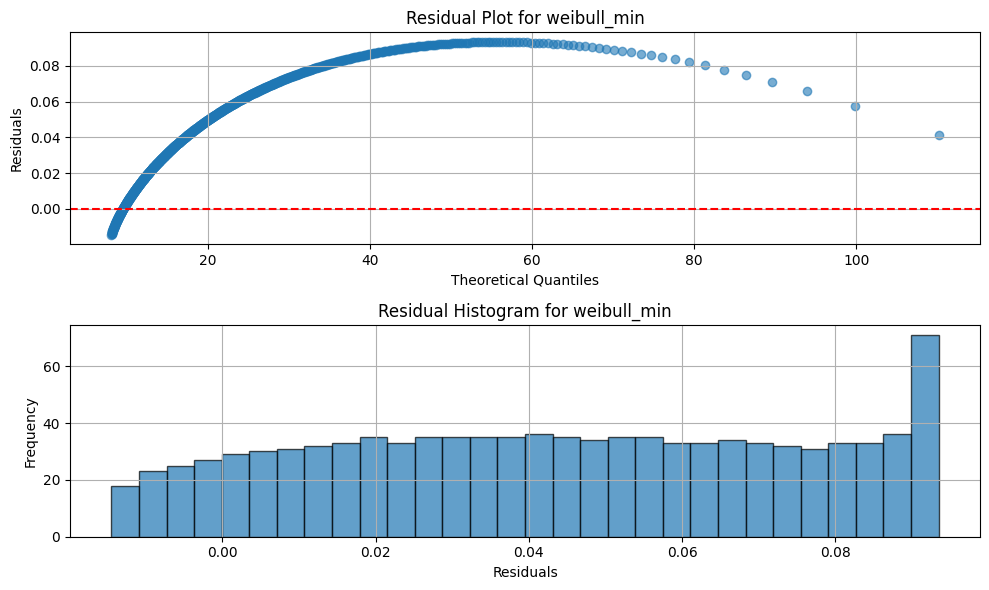

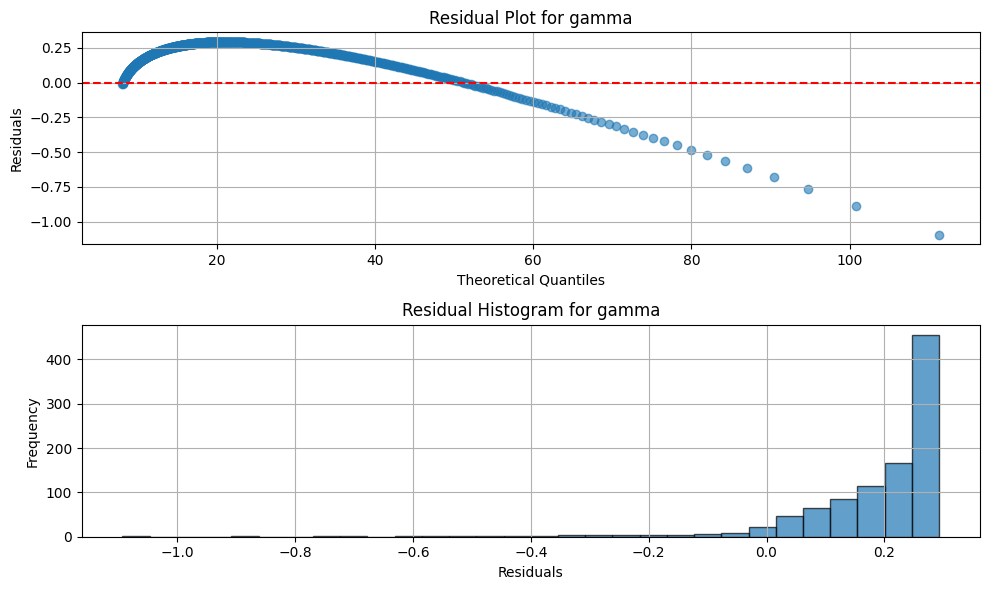

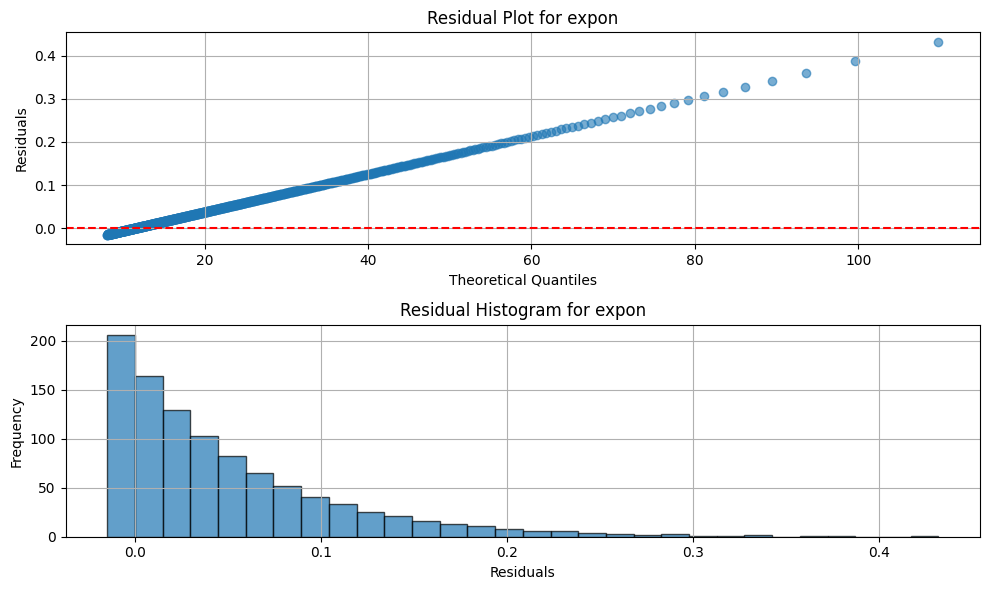

In [ ]:
fit_and_test_distributions(medically_complex_data)
calculate_and_plot_residuals(medically_complex_data, 'weibull_min')
calculate_and_plot_residuals(medically_complex_data, 'gamma')
calculate_and_plot_residuals(medically_complex_data, 'expon')

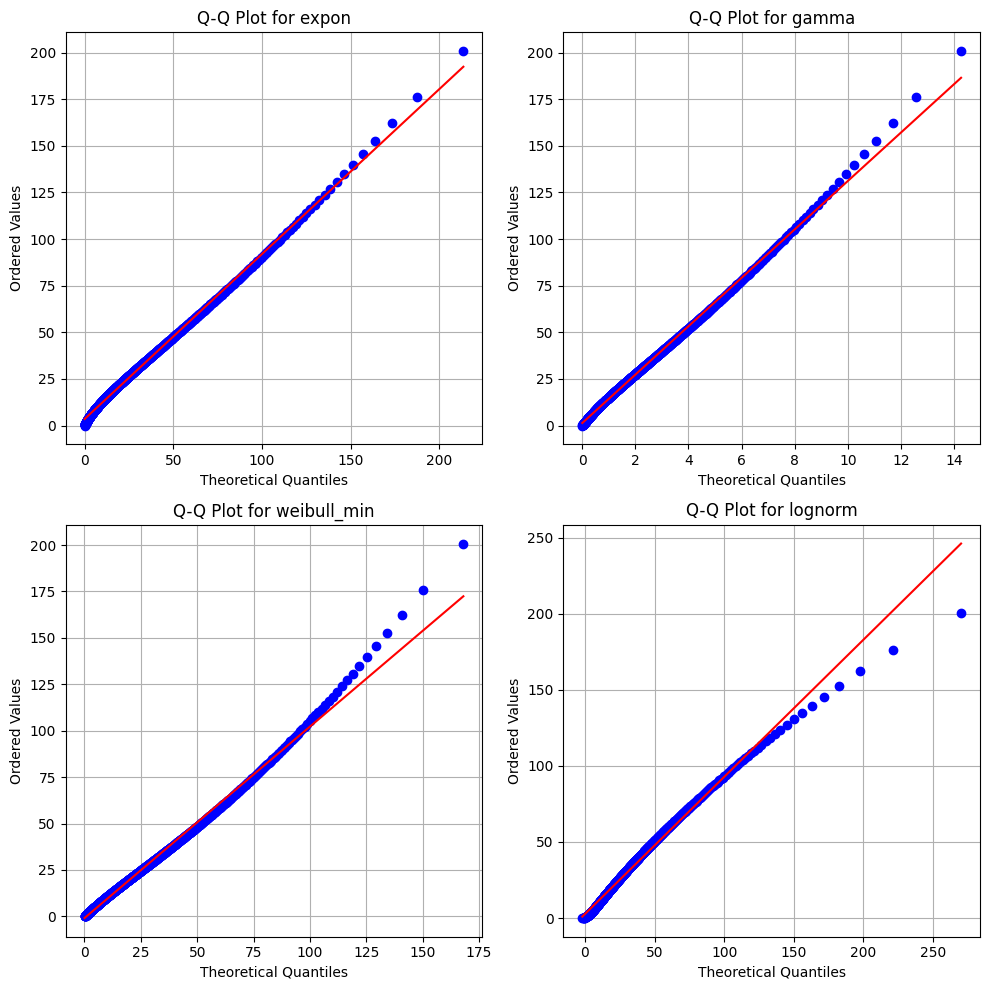

Kolmogorov-Smirnov Test Results:
expon: KS Statistic = 0.0710, p-value = 1.6359e-04
gamma: KS Statistic = 0.8251, p-value = 0.0000e+00
weibull_min: KS Statistic = 0.0152, p-value = 9.8043e-01
lognorm: KS Statistic = 0.0205, p-value = 8.2269e-01


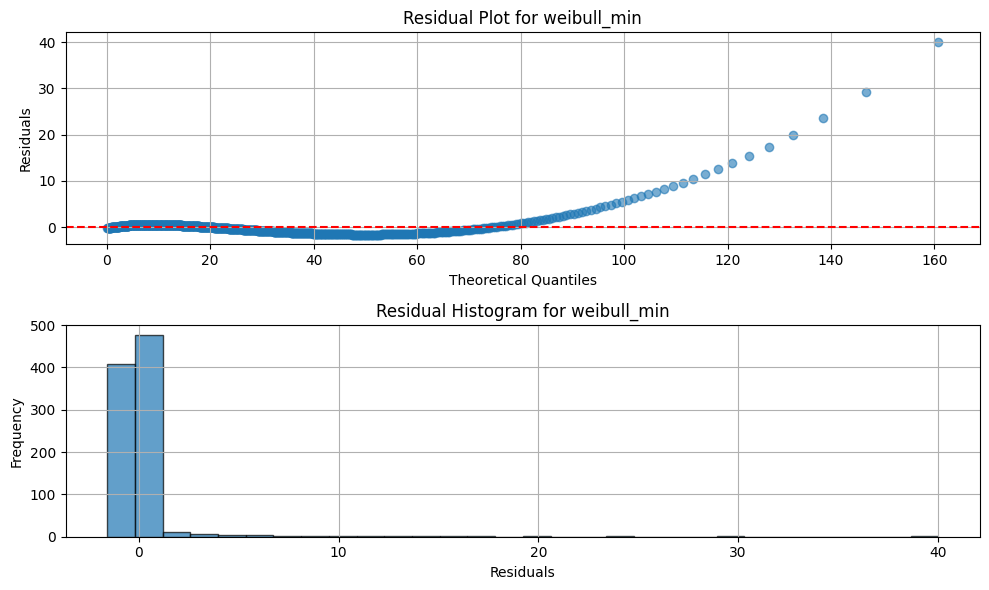

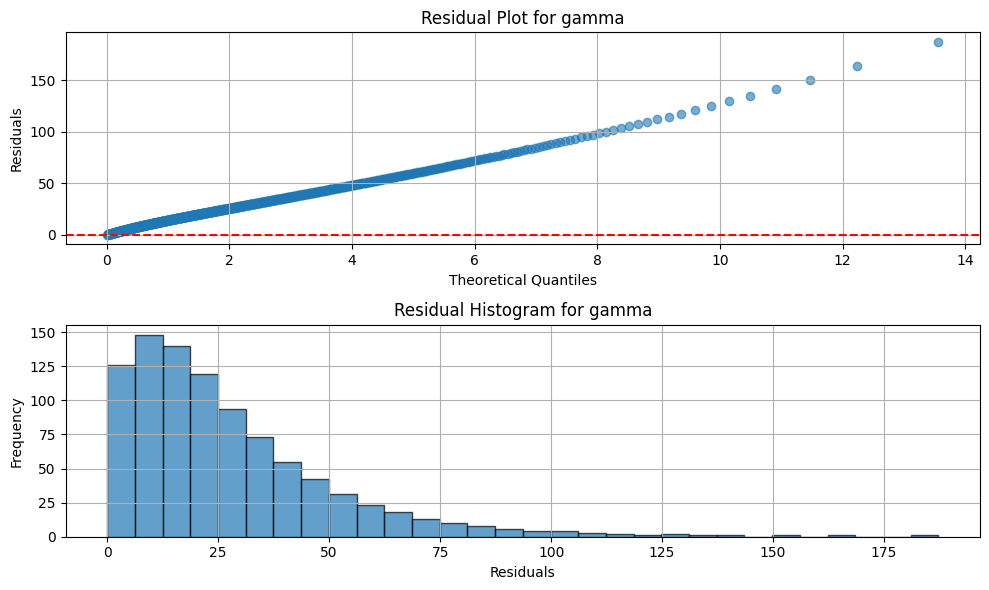

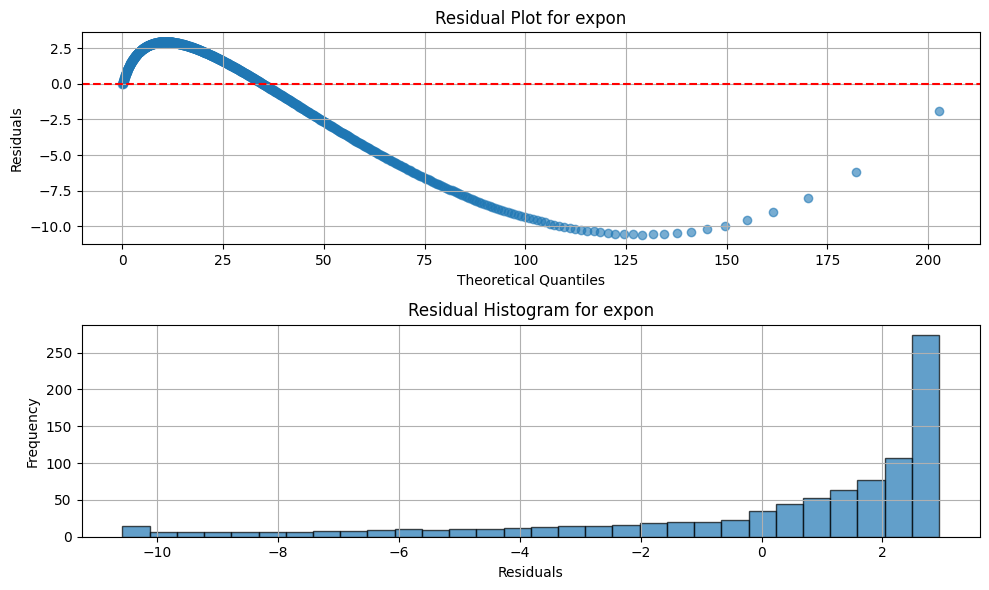

In [ ]:
fit_and_test_distributions(stroke_data)
calculate_and_plot_residuals(stroke_data, 'weibull_min')
calculate_and_plot_residuals(stroke_data, 'gamma')
calculate_and_plot_residuals(stroke_data, 'expon')

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [expon  ] [0.00 sec] [RSS: 0.000156283] [loc=0.004 scale=29.670]
[distfit] >INFO> [lognorm] [0.00 sec] [RSS: 3.27213e-05] [loc=-4.425 scale=26.267]
[distfit] >INFO> [gamma  ] [0.03 sec] [RSS: 0.0150626] [loc=0.004 scale=1.863]
[distfit] >INFO> [expon  ] [0.05 sec] [RSS: 0.000156283] [loc=0.004 scale=29.670]
[distfit] >INFO> [lognorm] [0.05 sec] [RSS: 3.27213e-05] [loc=-4.425 scale=26.267]
[distfit] >INFO> [gamma  ] [0.04 sec] [RSS: 0.0150626] [loc=0.004 scale=1.863]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Lognorm(loc:-4.425083, scale:26.266630)
[distfit] >INFO> Ploting Summary.


0.033704078193461405


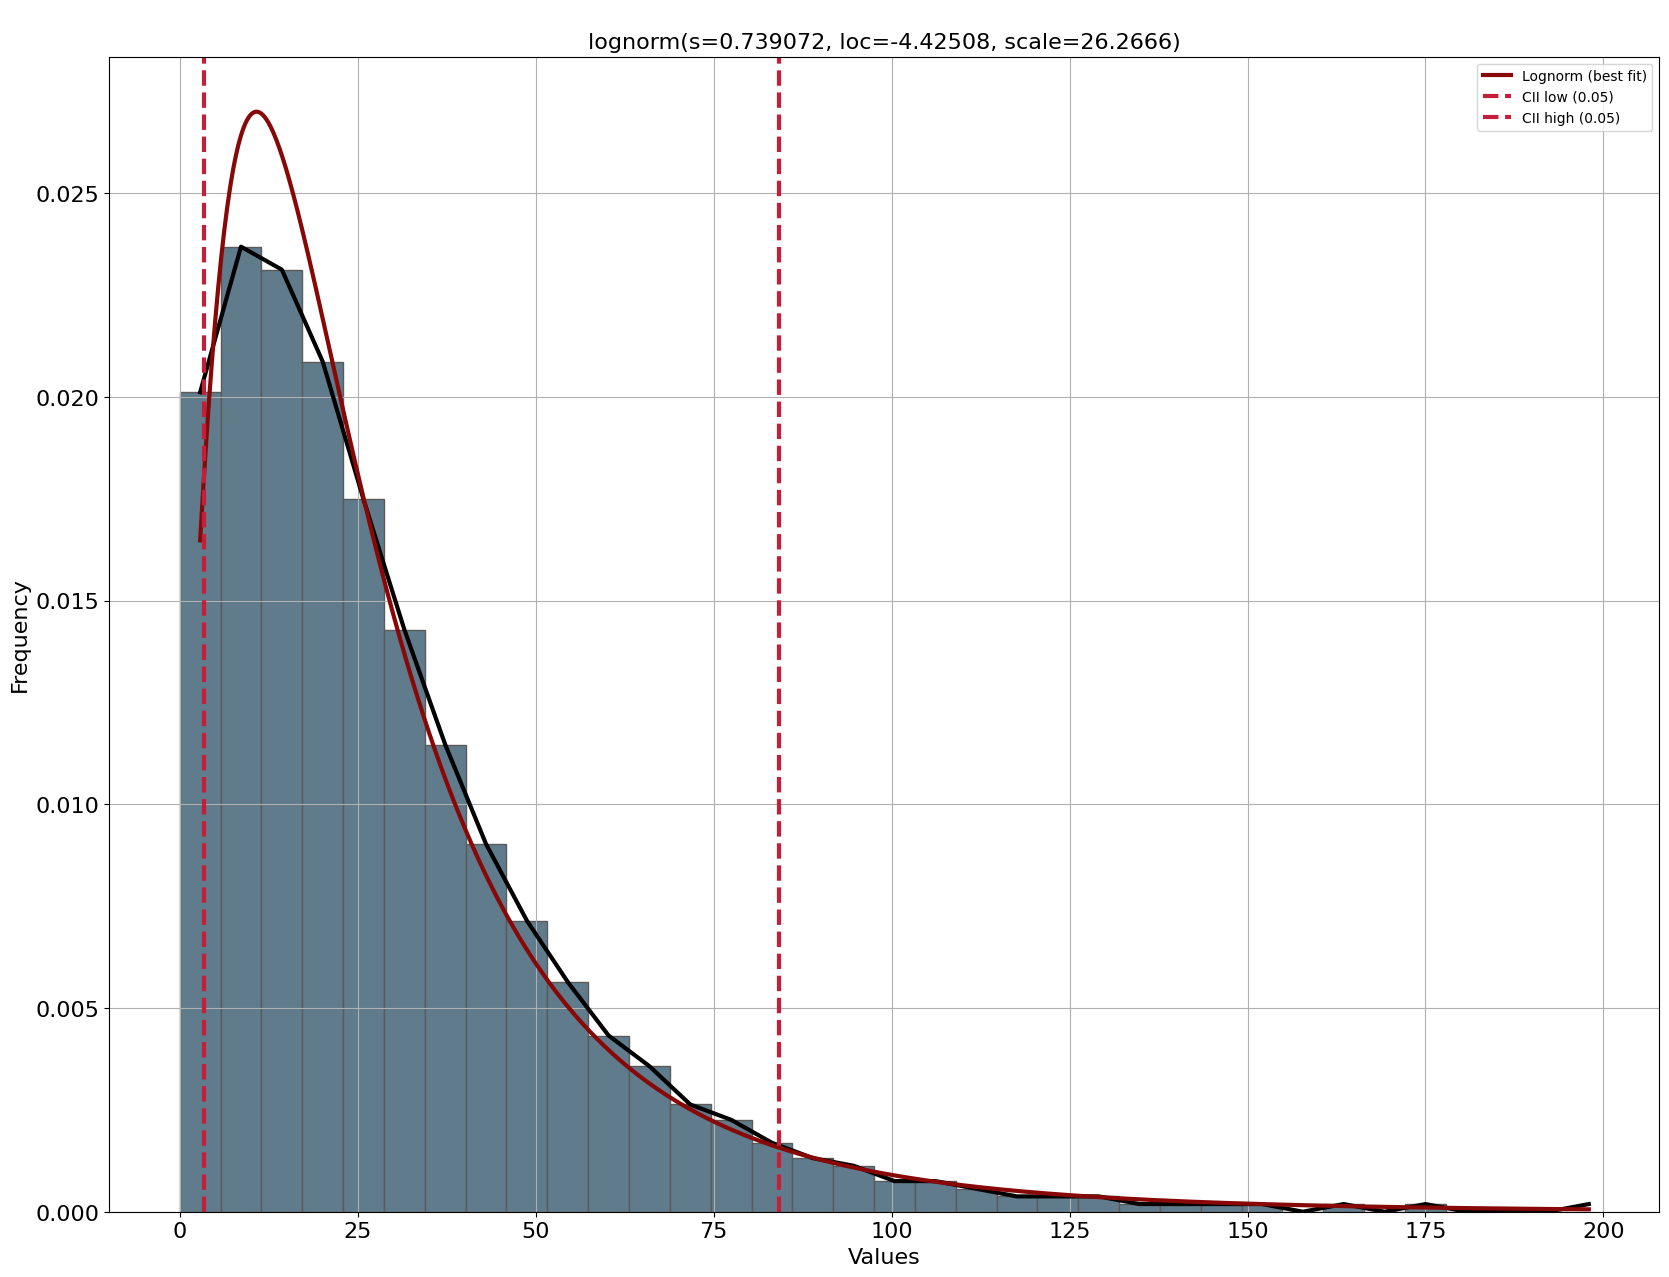

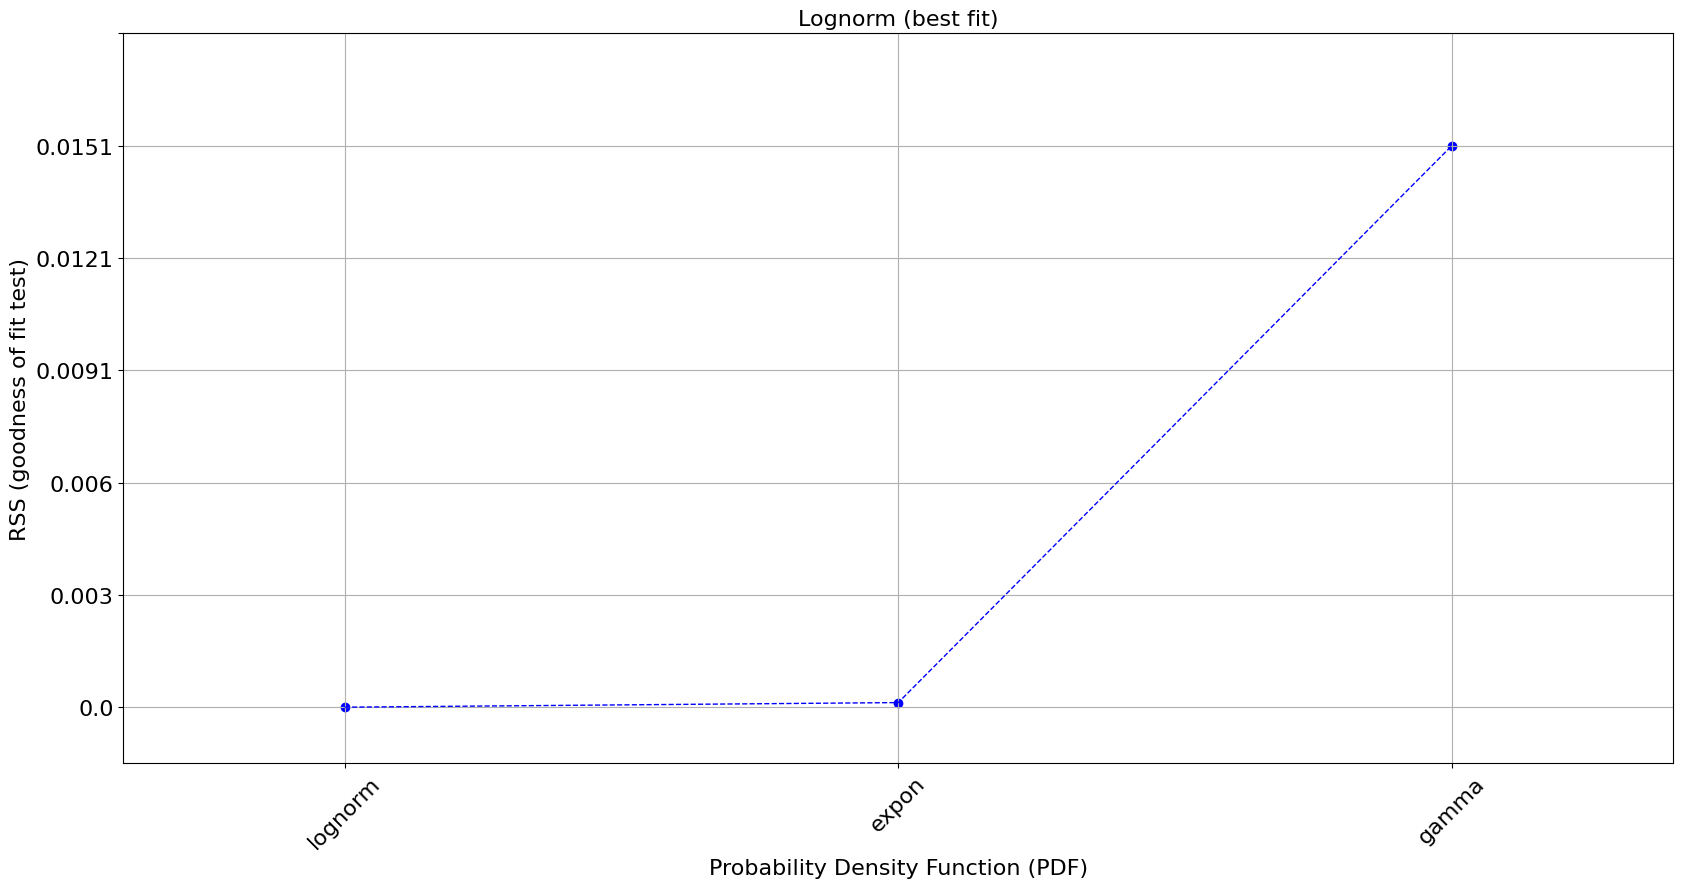

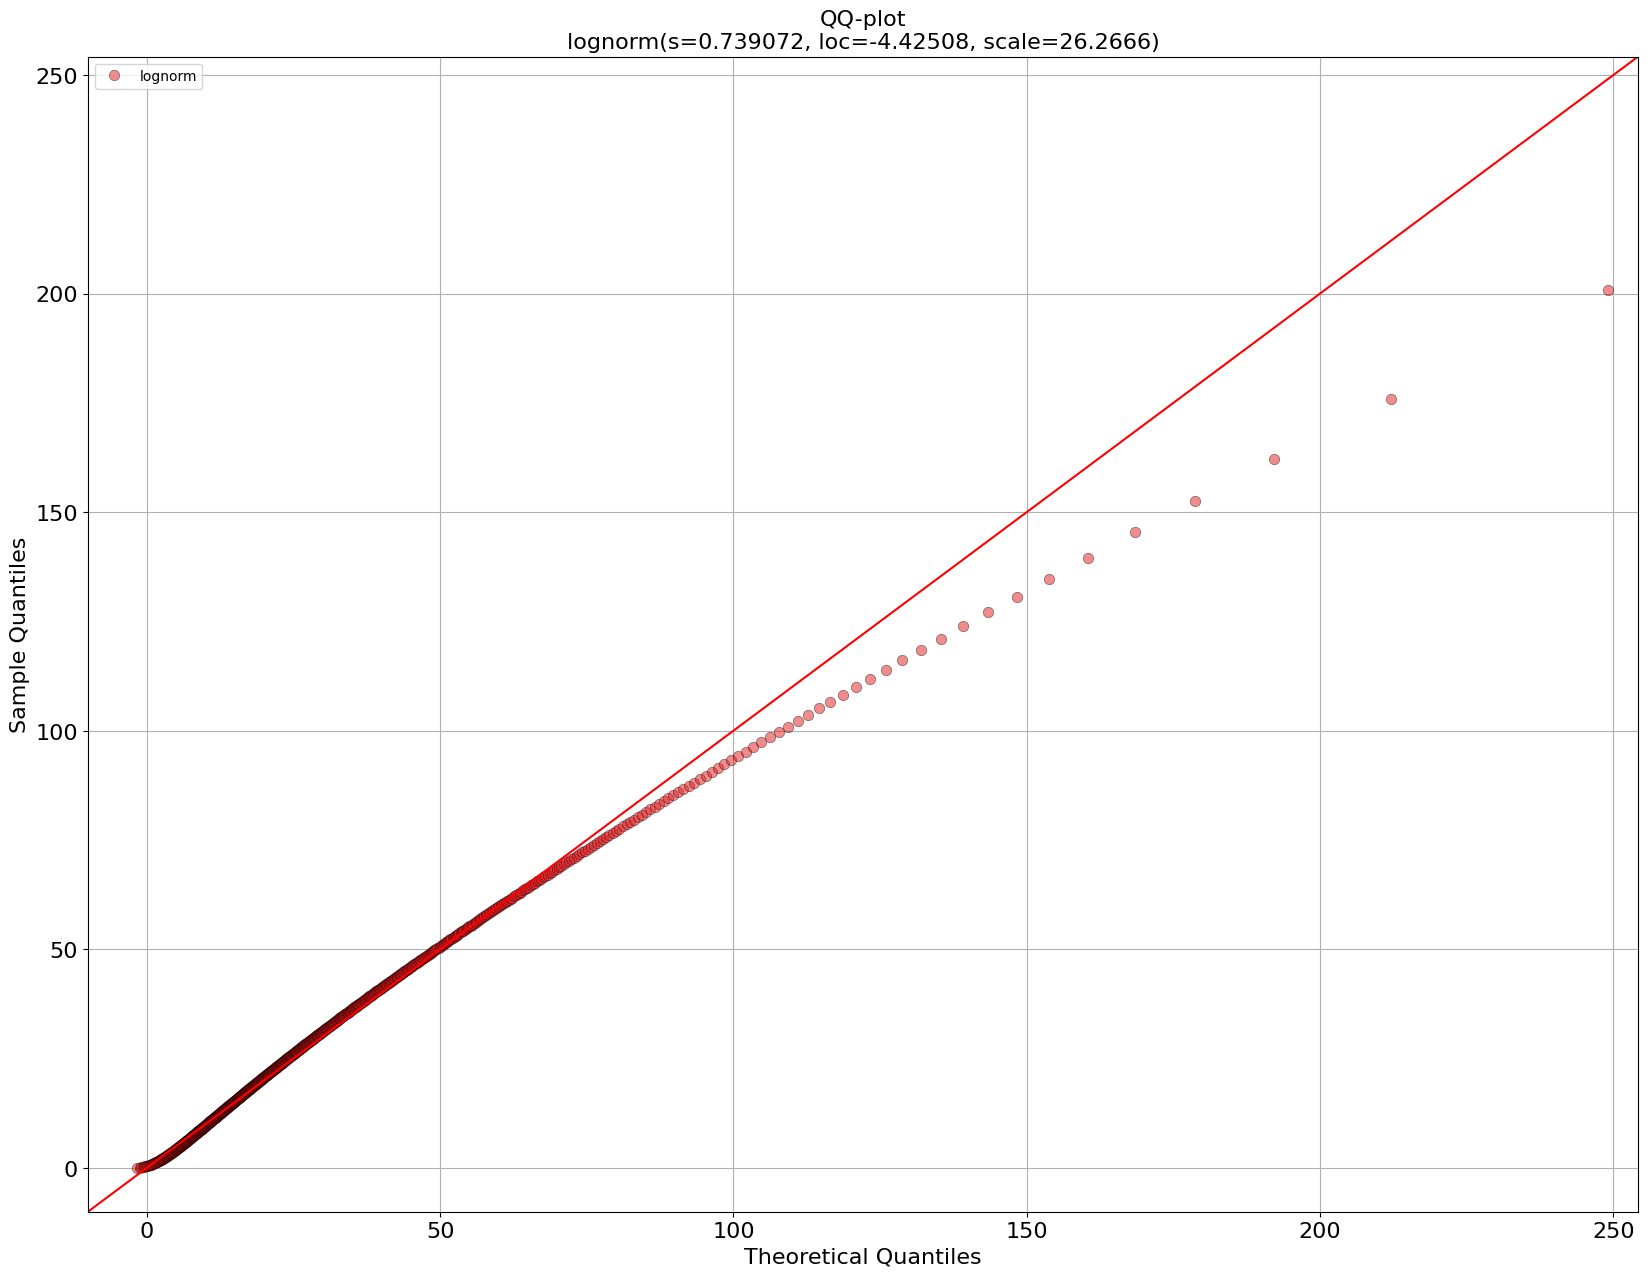

In [ ]:
fit_and_plot(stroke_data, ['expon', 'lognorm', 'gamma'])
print(1/29.670)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm       ] [0.00 sec] [RSS: 0.00317575] [loc=22.801 scale=14.564]
[distfit] >INFO> [expon      ] [0.00 sec] [RSS: 5.16634e-07] [loc=8.080 scale=14.721]
[distfit] >INFO> [gamma      ] [0.06 sec] [RSS: 6.99783e-06] [loc=8.080 scale=15.167]
[distfit] >INFO> [lognorm    ] [0.00 sec] [RSS: 0.000184815] [loc=6.972 scale=10.486]
[distfit] >INFO> [weibull_min] [0.05 sec] [RSS: 5.4108e-07] [loc=8.080 scale=14.713]
[distfit] >INFO> [norm       ] [0.14 sec] [RSS: 0.00317575] [loc=22.801 scale=14.564]
[distfit] >INFO> [expon      ] [0.14 sec] [RSS: 5.16634e-07] [loc=8.080 scale=14.721]
[distfit] >INFO> [gamma      ] [0.14 sec] [RSS: 6.99783e-06] [loc=8.080 scale=15.167]
[distfit] >INFO> [lognorm    ] [0.07 sec] [RSS: 0.000184815] [loc=6.972 scale=10.486]
[distfit] >INFO> [weibull_min] [0.06 sec] [RSS: 5.4108e-07] [loc=8.080 scale=14.713]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot fo

0.06792830357756638


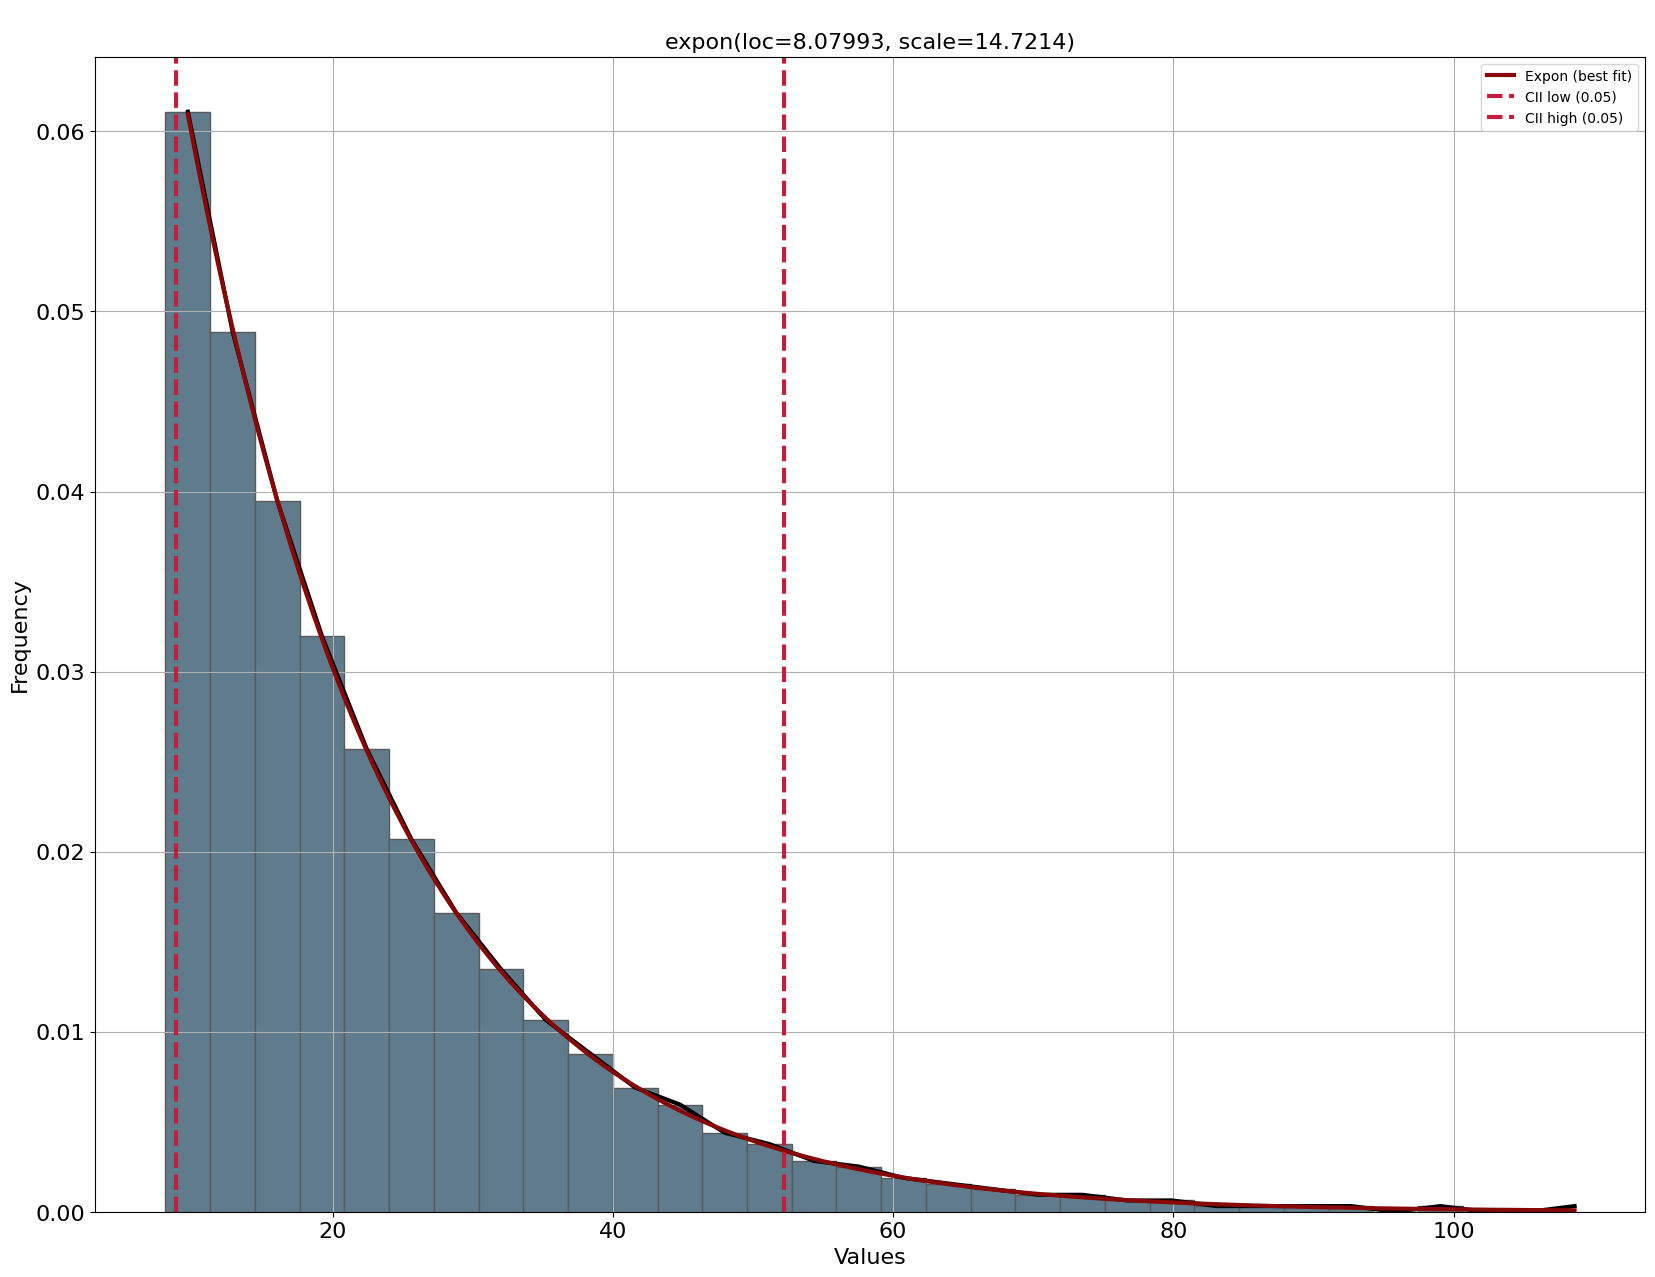

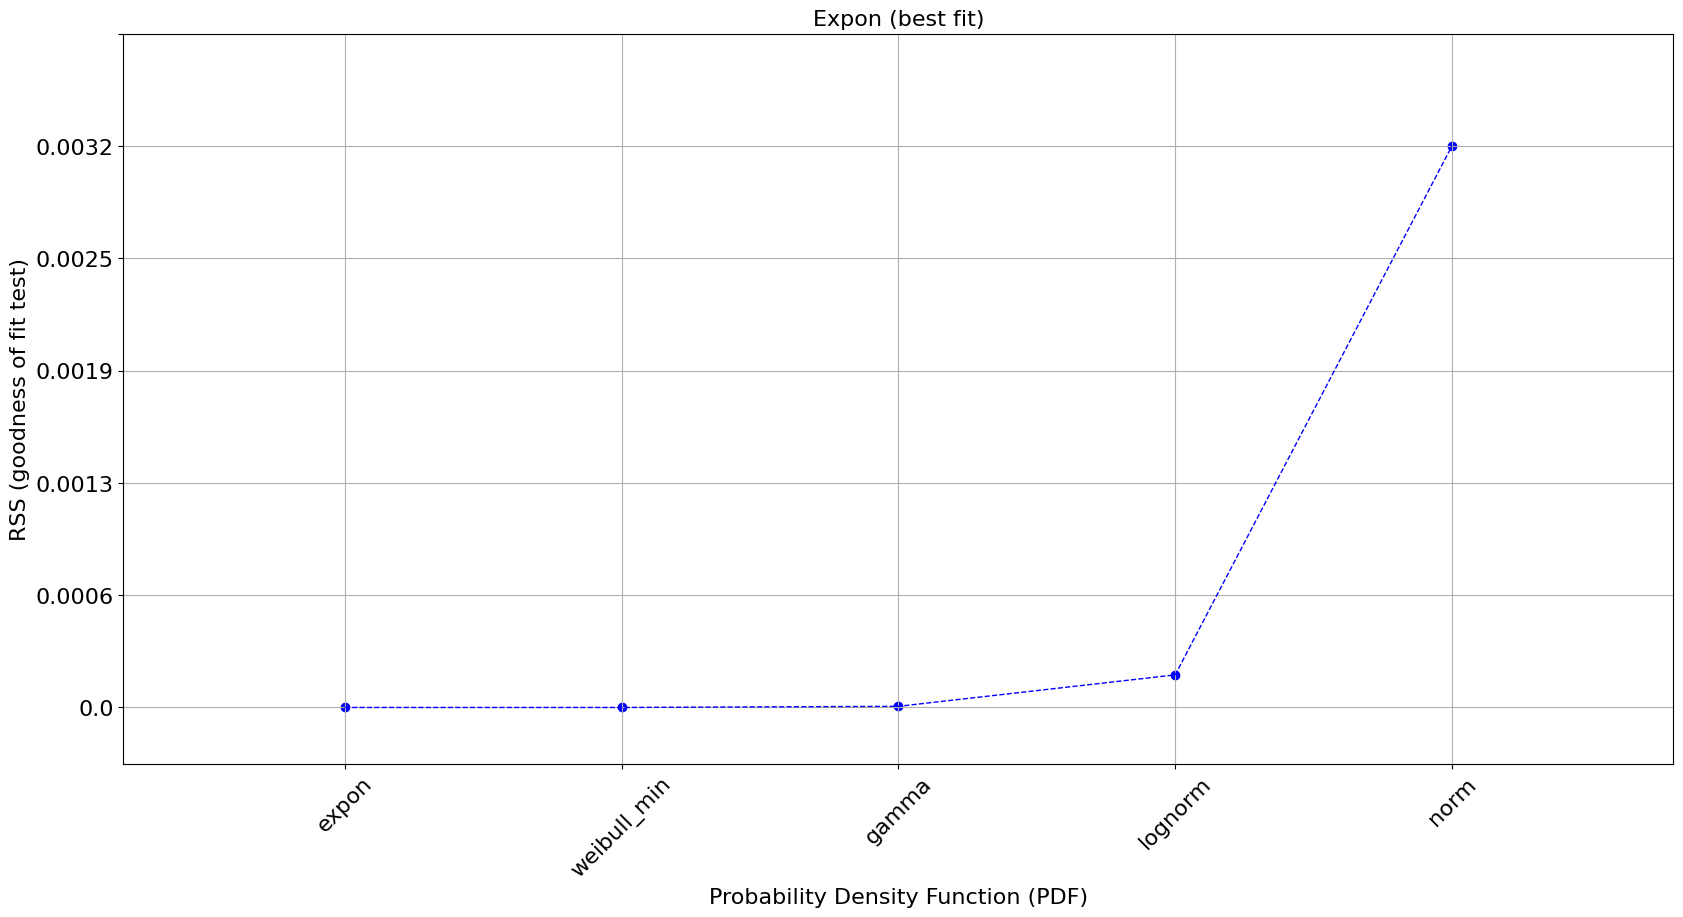

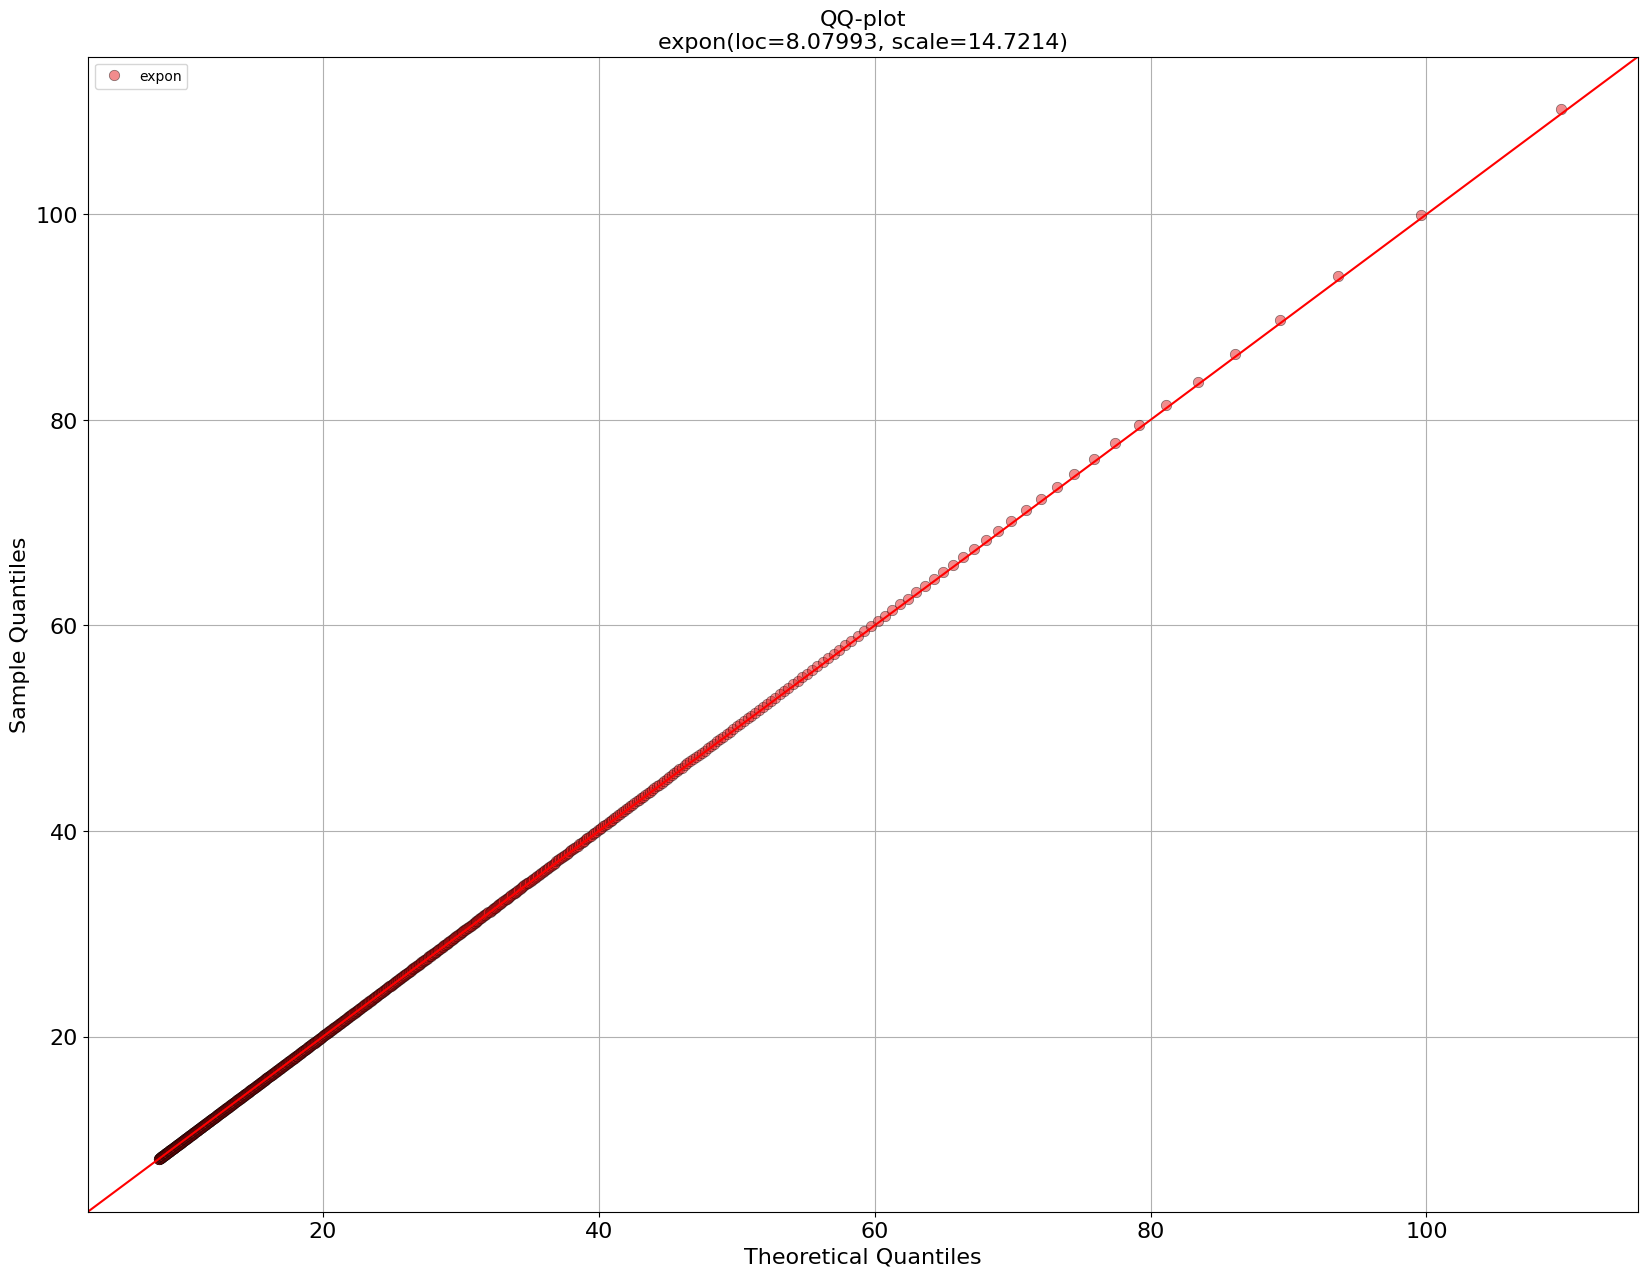

In [ ]:
fit_and_plot(medically_complex_data)
print(1/14.721404)